In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sn
import lazypredict

# Import Data

In [65]:
data = pd.read_csv('data.csv') 
display(data.head(10))

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [66]:
display(data.tail(10))

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
510,67,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,Negative
511,66,Male,No,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
512,43,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative
513,62,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,Positive
514,54,Female,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,No,Positive
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


# Data info

In [67]:
# kratak opis podataka, ukupan broj vrsta, tipovi atributa, broj null vrednosti
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

# Visualize Data

<Axes: >

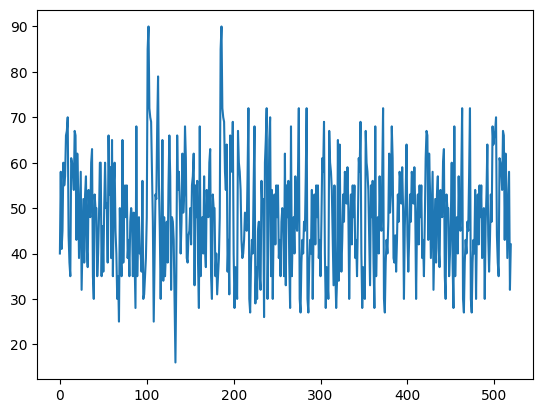

In [68]:
data['Age'].plot()

<Axes: >

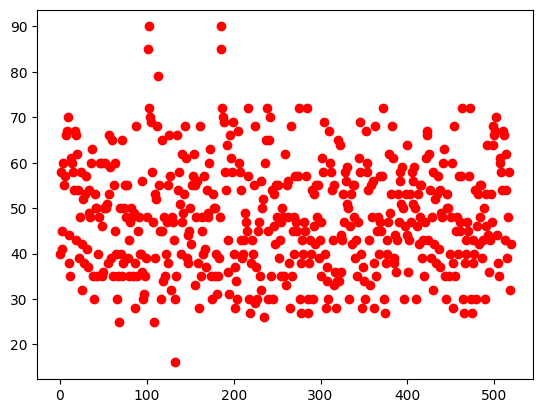

In [69]:
data['Age'].plot(style = 'ro')

<Axes: ylabel='Frequency'>

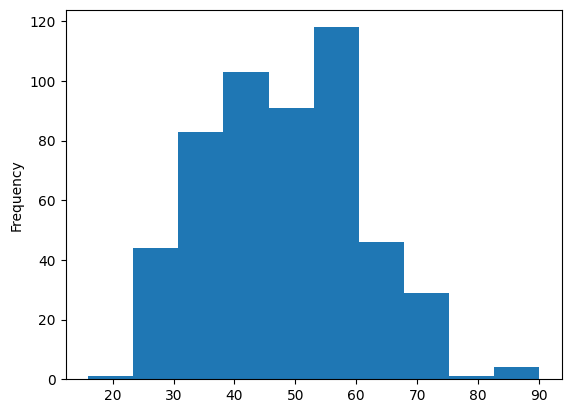

In [70]:
data['Age'].plot.hist()

<Axes: ylabel='Frequency'>

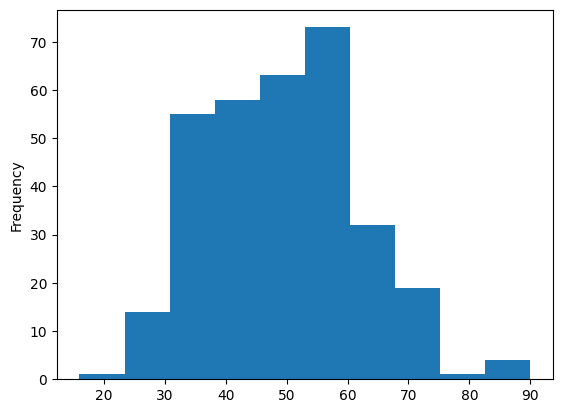

In [71]:
data_pos = data[data['class'] == 'Positive']
data_pos['Age'].plot.hist()

In [72]:
data_pos = data[data['class'] == 'Negative']
data_pos

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
200,40,Male,No,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Negative
201,28,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Negative
202,37,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
203,34,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
204,30,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,67,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,Negative
511,66,Male,No,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
512,43,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [73]:
data_pos = data[data['class'] == 'Positive']
data_pos

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,62,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,Positive
514,54,Female,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,No,Positive
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive


<Axes: ylabel='Frequency'>

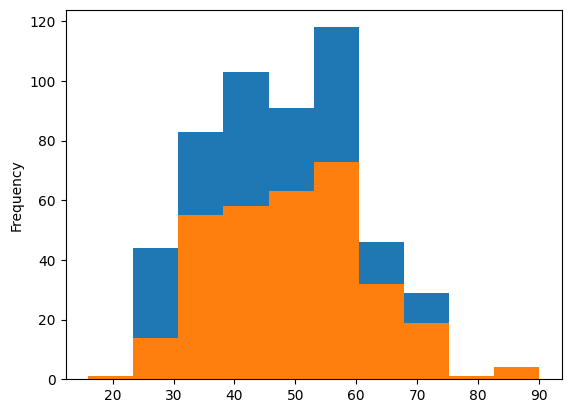

In [74]:
data['Age'].plot.hist()
data_pos['Age'].plot.hist()

In [75]:
outliers = data[(data['Age']<=20) | (data['Age']>=75)]
outliers

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
101,85,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
102,90,Female,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,Positive
113,79,Male,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,Positive
133,16,Male,Yes,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Positive
185,85,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
186,90,Female,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,Positive


In [76]:
data.shape

(520, 17)

In [77]:
data = data.drop(outliers.index)
data.shape

(514, 17)

# Pie Charts

In [78]:
poly = data['Polyuria'].to_numpy()
classes = data['class'].to_numpy()

In [79]:
polyYes = classes[poly == 'Yes']


In [80]:
m = polyYes[polyYes == 'Positive'].shape[0]
n = polyYes.shape[0]
m, n

(240, 255)

0.9411764705882353


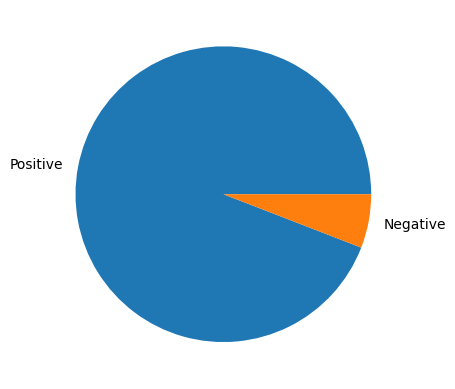

In [81]:
# samo za polyuria pozitivno
labels = 'Positive', 'Negative'
sizes = [m, n - m]
plt.pie(sizes, labels = labels)
print(m / n)

In [82]:
polyNo = classes[poly == 'No']
m = polyNo[polyNo == 'Positive'].shape[0]
n = polyNo.shape[0]
m, n

(74, 259)

0.7142857142857143


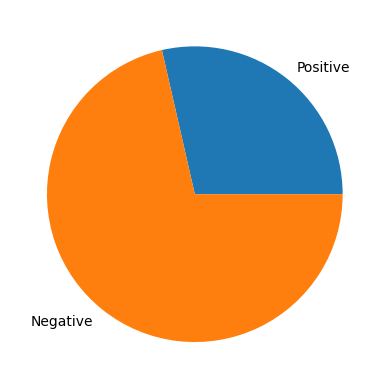

In [83]:
# samo za polyuria negativno
labels = 'Positive', 'Negative'
sizes = [m, n - m]
plt.pie(sizes, labels = labels)
print((n - m) / n)

In [84]:
# Correlation between Symptoms and Diabetes cases

data['Gender'] = data['Gender'].map({'Male':1,'Female':0})
data['class'] = data['class'].map({'Positive':1,'Negative':0})
data['Polyuria'] = data['Polyuria'].map({'Yes':1,'No':0})
data['Polydipsia'] = data['Polydipsia'].map({'Yes':1,'No':0})
data['sudden weight loss'] = data['sudden weight loss'].map({'Yes':1,'No':0})
data['weakness'] = data['weakness'].map({'Yes':1,'No':0})
data['Polyphagia'] = data['Polyphagia'].map({'Yes':1,'No':0})
data['Genital thrush'] = data['Genital thrush'].map({'Yes':1,'No':0})
data['visual blurring'] = data['visual blurring'].map({'Yes':1,'No':0})
data['Itching'] = data['Itching'].map({'Yes':1,'No':0})
data['Irritability'] = data['Irritability'].map({'Yes':1,'No':0})
data['delayed healing'] = data['delayed healing'].map({'Yes':1,'No':0})
data['partial paresis'] = data['partial paresis'].map({'Yes':1,'No':0})
data['muscle stiffness'] = data['muscle stiffness'].map({'Yes':1,'No':0})
data['Alopecia'] = data['Alopecia'].map({'Yes':1,'No':0})
data['Obesity'] = data['Obesity'].map({'Yes':1,'No':0})

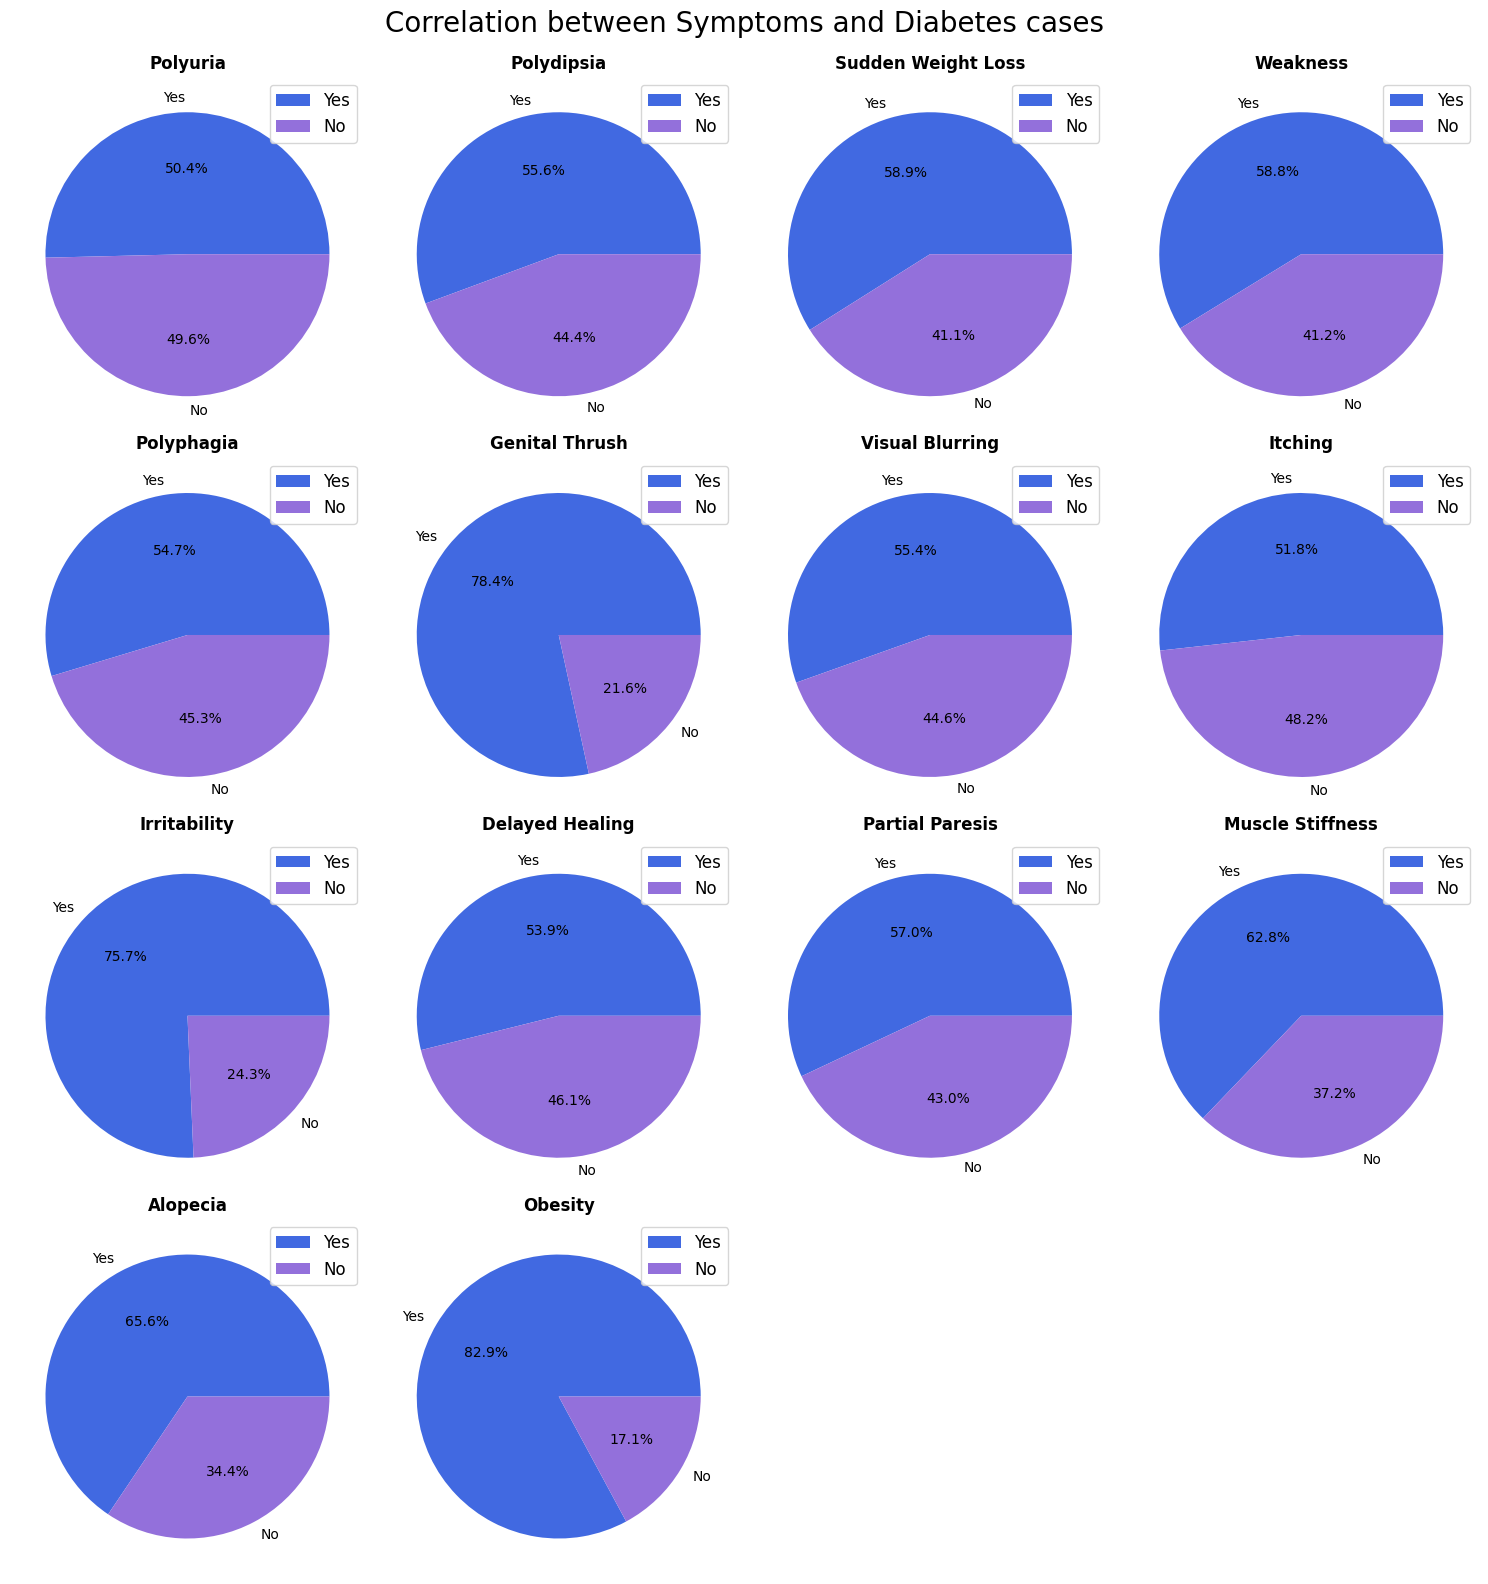

In [85]:
count = 1
plt.figure(figsize=(15,20))
plt.suptitle('Correlation between Symptoms and Diabetes cases'+ '\n', fontsize=20)
for i in data.columns:
    if i not in ['class', 'Age', 'Gender']:
        plt.subplot(5,4,count)
        plt.title(f'{i.title()}', fontweight='bold', fontsize=14)
        count +=1
        plt.tight_layout()
        data[i].value_counts().plot(kind="pie", colors=['royalblue','mediumpurple'],autopct='%1.1f%%',legend=True,labels=["Yes","No"])
        plt.ylabel('')
        plt.title(f'{i.title()}',fontweight='bold',fontsize=12)
        plt.legend(loc = "upper right",fontsize=12)
plt.tight_layout() 
plt.show()

# One-hot vector - gender

Podaci u obliku stringova, modeli mašinskog učenja mogu pogrešno tumačiti da postoji neka vrsta hijerarhije među njima.
Oznake pola nemaju određen redosled ili hijerarhiju.

In [86]:
data['Gender'] = data['Gender'].map({1:'Male',0:'Female'})
data['Gender'] = data['Gender'].astype('category')
one_hot = pd.get_dummies(data['Gender'])
one_hot.replace({False: 0, True: 1}, inplace=True)
one_hot

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
515,1,0
516,1,0
517,1,0
518,1,0


In [87]:
data = pd.concat([ one_hot,data], axis=1)
data = data.drop('Gender', axis=1)
data

,Female,Male,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,1,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0,1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0,1,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0,1,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0,1,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1,0,39,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,1,0,48,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,1,0,58,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,1,0,32,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


# Label encoding

Ovim tipom enkodiranja pokušavamo da sačuvamo značenje elementa gde se viši prioritet dodeljuje elementima sa većom važnošću.

In [88]:
data = data.replace(
    ['Yes', 'No', 'Positive', 'Negative'], 
    [1, 0, 1, 0])
data

,Female,Male,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,1,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0,1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0,1,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0,1,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0,1,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1,0,39,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,1,0,48,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,1,0,58,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,1,0,32,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


# Standardizing of features

Skaliranje osobina je bitno jer osigurava da sve osobine podjednako doprinose procesu obuke. 

In [89]:
from sklearn import preprocessing

In [90]:
x = data['Age'].to_numpy()

#StandardScaler očekuje dvodimenzionalni ulaz.
a = np.reshape(x,(-1, 1))
a.shape

(514, 1)

In [91]:
# Kreiranje objekta StandardScaler
scaler = preprocessing.StandardScaler()

# Izračunava srednju vrednost i standardnu devijaciju podataka
standardized = scaler.fit_transform(a)

In [92]:
# Računa se srednja vrednost standardizovanih podataka
standardized.mean()

2.2722852566258066e-16

In [93]:
# Računa se standardna devijacija standardizovanih podataka
standardized.std()

1.0

(array([19., 43., 81., 62., 82., 54., 61., 52., 31., 29.]),
 array([-1.9706461 , -1.56305305, -1.15546   , -0.74786694, -0.34027389,
         0.06731916,  0.47491221,  0.88250527,  1.29009832,  1.69769137,
         2.10528442]),
 <BarContainer object of 10 artists>)

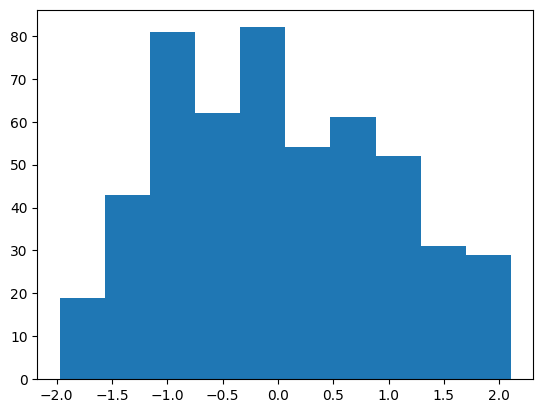

In [94]:
plt.hist(standardized)

In [95]:
data['Age'] = standardized
data

,Female,Male,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,1,-0.669817,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0,1,0.891177,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0,1,-0.583095,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0,1,-0.236208,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0,1,1.064621,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1,0,-0.756539,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,1,0,0.023958,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,1,0,0.891177,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,1,0,-1.363593,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


# Corellation matrix

In [96]:
data.corr()

,Female,Male,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Female,1.000000,-1.000000,-0.076025,0.280037,0.314121,0.286792,0.133992,0.233751,-0.215793,0.205568,0.051031,0.016852,0.108287,0.344429,0.086716,-0.342921,0.005038,0.454091
Male,-1.000000,1.000000,0.076025,-0.280037,-0.314121,-0.286792,-0.133992,-0.233751,0.215793,-0.205568,-0.051031,-0.016852,-0.108287,-0.344429,-0.086716,0.342921,-0.005038,-0.454091
Age,-0.076025,0.076025,1.000000,0.224892,0.105954,0.037485,0.234921,0.335657,0.040456,0.399295,0.277719,0.217299,0.273641,0.235170,0.293553,0.331965,0.160936,0.094386
Polyuria,0.280037,-0.280037,0.224892,1.000000,0.610040,0.453414,0.262231,0.370554,0.093921,0.237930,0.093173,0.244770,0.143804,0.442979,0.154954,-0.137671,0.127496,0.672183
Polydipsia,0.314121,-0.314121,0.105954,0.610040,1.000000,0.401255,0.334420,0.319741,0.007258,0.326351,0.117493,0.205863,0.116830,0.442720,0.172421,-0.317414,0.103596,0.648324
sudden weight loss,0.286792,-0.286792,0.037485,0.453414,0.401255,1.000000,0.289441,0.241134,0.071450,0.063611,-0.014290,0.144612,0.092907,0.265846,0.103068,-0.205250,0.177178,0.430750
weakness,0.133992,-0.133992,0.234921,0.262231,0.334420,0.289441,1.000000,0.175459,0.026721,0.305748,0.310731,0.143308,0.331012,0.264648,0.268077,0.099842,0.045069,0.247315
Polyphagia,0.233751,-0.233751,0.335657,0.370554,0.319741,0.241134,0.175459,1.000000,-0.069496,0.300311,0.145313,0.239917,0.263160,0.369594,0.326883,-0.043061,0.032255,0.341970
Genital thrush,-0.215793,0.215793,0.040456,0.093921,0.007258,0.071450,0.026721,-0.069496,1.000000,-0.166030,0.108279,0.165379,0.140558,-0.207488,-0.119830,0.206735,0.062710,0.098826
visual blurring,0.205568,-0.205568,0.399295,0.237930,0.326351,0.063611,0.305748,0.300311,-0.166030,1.000000,0.285999,0.084940,0.175979,0.367967,0.404246,0.009408,0.112163,0.249732


<Axes: >

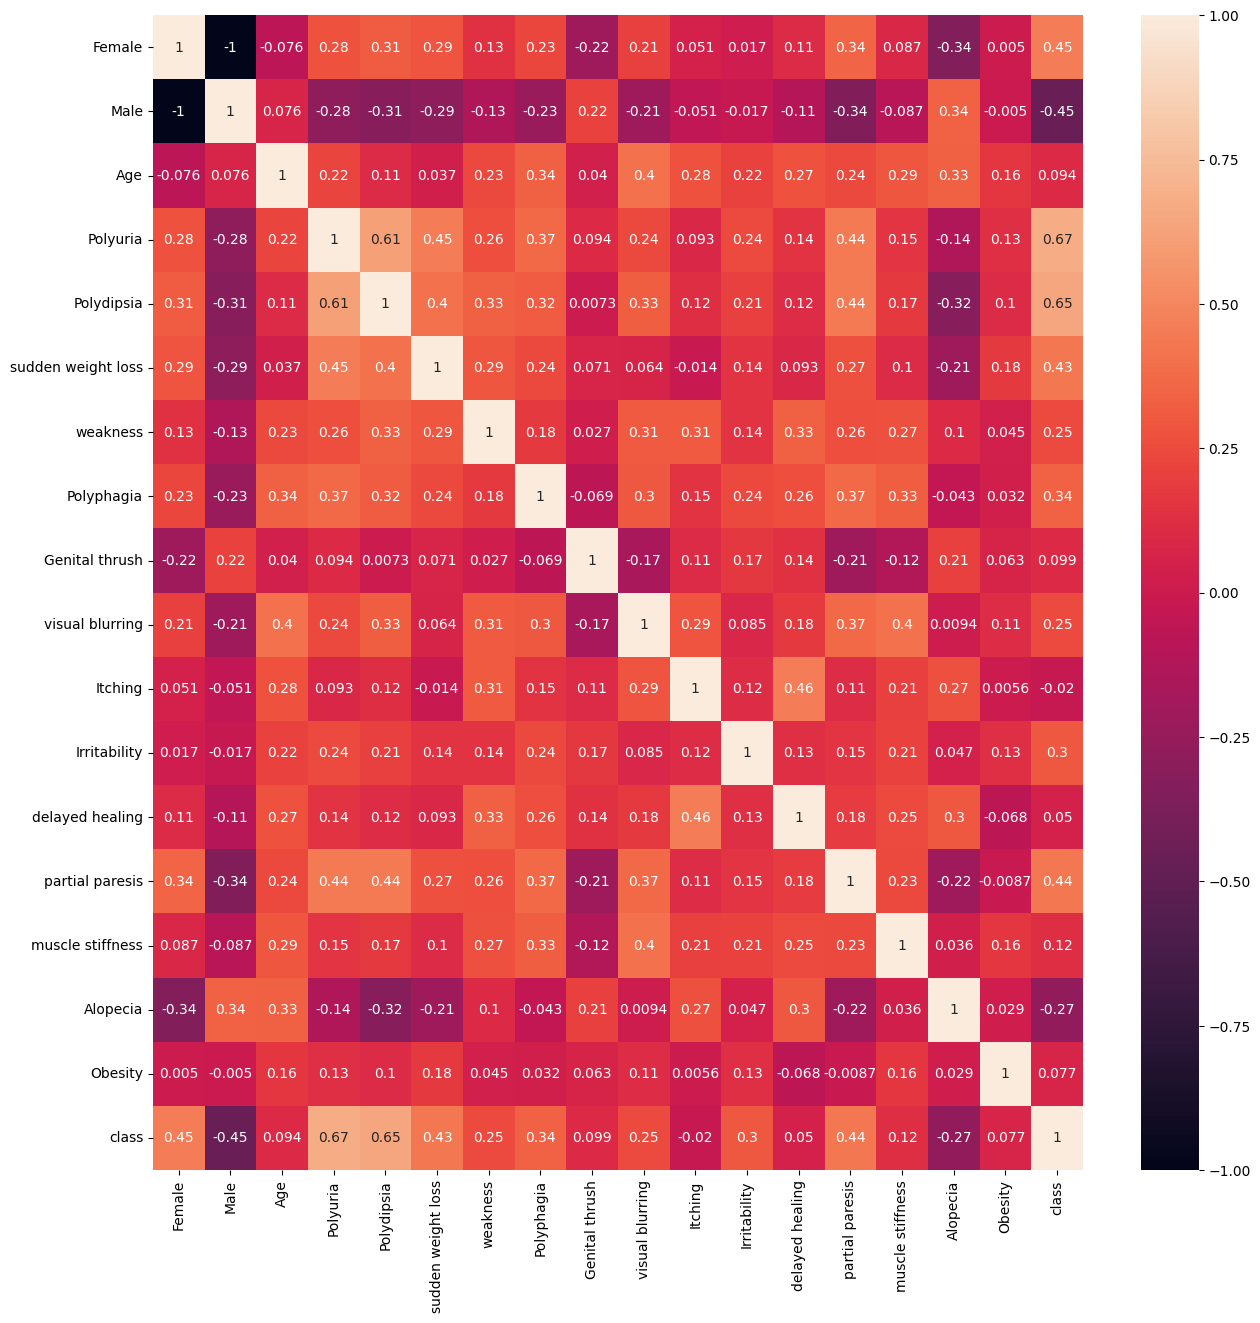

In [97]:
import seaborn as sn
fig, ax = plt.subplots(figsize=(15,15))
sn.heatmap(data.corr(),annot=True, ax=ax)

# Redukcija dimenzionalnosti

## Thresholding Binary Feature Variance

 Thresholding binary features variance se odnosi na primenu praga (threshold) na varijansu binarnih osobina kako bi se odredile koje osobine zadržati, a koje odbaciti.
 
 Ako je varijansa bliska nuli, to znači da su sve vrednosti u toj osobini iste (npr. sve su 0 ili sve su 1). Sa druge strane, ako je varijansa veća, to ukazuje na to da postoje promene između vrednosti, što može biti korisno za model. Ovaj pristup može biti koristan ako želimo eliminisati binarne osobine koje imaju vrlo malu varijansu, što znači da se u većini slučajeva ne menjaju.

In [98]:
# Load library
from sklearn.feature_selection import VarianceThreshold

In [99]:
binn = data.drop(['class', 'Age'], axis=1)
binn

,Female,Male,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,1,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,1,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [100]:
# Run threshold by variance
thresholder = VarianceThreshold(threshold=(.75 * (1 - .75)))
thr_var = thresholder.fit(binn).variances_
thr_var

array([0.23300883, 0.23300883, 0.24998486, 0.24681676, 0.24199079,
       0.24233524, 0.2478198 , 0.16931748, 0.24703251, 0.24969341,
       0.18404896, 0.24848597, 0.24509455, 0.23351224, 0.22577556,
       0.14189465])

In [101]:
to_drop = (thr_var <= (.75 * (1 - .75))).nonzero()[0]
binn.columns[to_drop]

Index(['Genital thrush', 'Irritability', 'Obesity'], dtype='object')

In [102]:
binn.drop(binn.columns[to_drop], axis = 1, inplace = True)
binn

,Female,Male,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Itching,delayed healing,partial paresis,muscle stiffness,Alopecia
0,0,1,0,1,0,1,0,0,1,1,0,1,1
1,0,1,0,0,0,1,0,1,0,0,1,0,1
2,0,1,1,0,0,1,1,0,1,1,0,1,1
3,0,1,0,0,1,1,1,0,1,1,0,0,0
4,0,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1,0,1,1,1,0,1,0,1,1,1,0,0
516,1,0,1,1,1,1,1,0,1,1,1,0,0
517,1,0,1,1,1,1,1,1,0,0,1,1,0
518,1,0,0,0,0,1,0,1,1,1,0,0,1


In [103]:
target = data['class']

In [104]:
data_without_min_cor = pd.concat([data['Age'], binn, target], axis=1)
data_without_min_cor

,Age,Female,Male,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Itching,delayed healing,partial paresis,muscle stiffness,Alopecia,class
0,-0.669817,0,1,0,1,0,1,0,0,1,1,0,1,1,1
1,0.891177,0,1,0,0,0,1,0,1,0,0,1,0,1,1
2,-0.583095,0,1,1,0,0,1,1,0,1,1,0,1,1,1
3,-0.236208,0,1,0,0,1,1,1,0,1,1,0,0,0,1
4,1.064621,0,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,-0.756539,1,0,1,1,1,0,1,0,1,1,1,0,0,1
516,0.023958,1,0,1,1,1,1,1,0,1,1,1,0,0,1
517,0.891177,1,0,1,1,1,1,1,1,0,0,1,1,0,1
518,-1.363593,1,0,0,0,0,1,0,1,1,1,0,0,1,0


## Handling Highly Correlated Features

Visoka korelacija između osobina može dovesti do problema kao što su višestruka kolinearnost, nepotreban višak informacija i otežano tumačenje rezultata. 

In [105]:
hcf_data = binn
hcf_data

,Female,Male,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Itching,delayed healing,partial paresis,muscle stiffness,Alopecia
0,0,1,0,1,0,1,0,0,1,1,0,1,1
1,0,1,0,0,0,1,0,1,0,0,1,0,1
2,0,1,1,0,0,1,1,0,1,1,0,1,1
3,0,1,0,0,1,1,1,0,1,1,0,0,0
4,0,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1,0,1,1,1,0,1,0,1,1,1,0,0
516,1,0,1,1,1,1,1,0,1,1,1,0,0
517,1,0,1,1,1,1,1,1,0,0,1,1,0
518,1,0,0,0,0,1,0,1,1,1,0,0,1


In [106]:
# Load libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [107]:
# Select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(hcf_data, target)
# Show results
print("Original number of features:", hcf_data.shape[1])
print("Reduced number of features:", features_kbest.shape[1])

Original number of features: 13
Reduced number of features: 5


In [108]:
# Select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=1)
features_kbest = chi2_selector.fit(hcf_data, target)

In [109]:
i = features_kbest.get_support(indices = True)

In [110]:
hcf_data.columns[i]

Index(['Polydipsia'], dtype='object')

In [111]:
hcf_data.columns

Index(['Female', 'Male', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'visual blurring', 'Itching',
       'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia'],
      dtype='object')

In [112]:
data_cleared = hcf_data.drop(['Polydipsia'], axis=1)

In [113]:
data_cleared.shape

(514, 12)

In [114]:
data_cleared = pd.concat([data['Age'], data_cleared, target], axis=1)
data_cleared

,Age,Female,Male,Polyuria,sudden weight loss,weakness,Polyphagia,visual blurring,Itching,delayed healing,partial paresis,muscle stiffness,Alopecia,class
0,-0.669817,0,1,0,0,1,0,0,1,1,0,1,1,1
1,0.891177,0,1,0,0,1,0,1,0,0,1,0,1,1
2,-0.583095,0,1,1,0,1,1,0,1,1,0,1,1,1
3,-0.236208,0,1,0,1,1,1,0,1,1,0,0,0,1
4,1.064621,0,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,-0.756539,1,0,1,1,0,1,0,1,1,1,0,0,1
516,0.023958,1,0,1,1,1,1,0,1,1,1,0,0,1
517,0.891177,1,0,1,1,1,1,1,0,0,1,1,0,1
518,-1.363593,1,0,0,0,1,0,1,1,1,0,0,1,0


# Class Balancing

In [115]:
class_counts = data['class'].value_counts()
print(class_counts)

class
1    314
0    200
Name: count, dtype: int64


C:\Users\Sokol\AppData\Local\Temp\ipykernel_10912\427854912.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


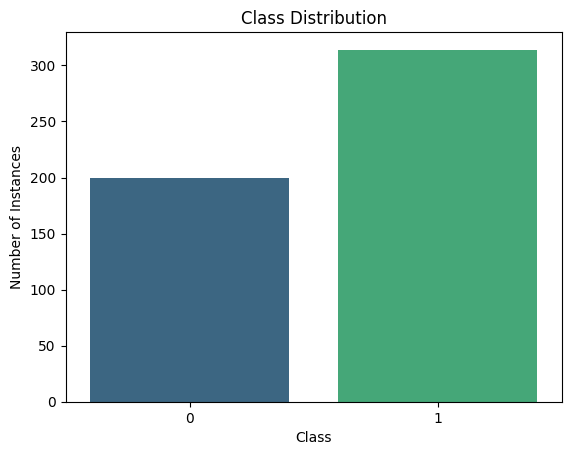

In [116]:
sn.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()

## RandomUnderSampler

Ova tehnika se koristi kako bi se smanjio broj instanci većinske klase (klase koja ima više primera) do određenog odnosa u odnosu na manjinsku klasu.

In [117]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(data.drop('class', axis=1), data['class'])

numericCols=data.drop(columns=["class"]).columns
dataUndersampled=pd.DataFrame(X_undersampled, columns=numericCols)
dataUndersampled["class"]=y_undersampled

In [118]:
class_counts = dataUndersampled['class'].value_counts()
print(class_counts)

class
0    200
1    200
Name: count, dtype: int64


C:\Users\Sokol\AppData\Local\Temp\ipykernel_10912\427854912.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


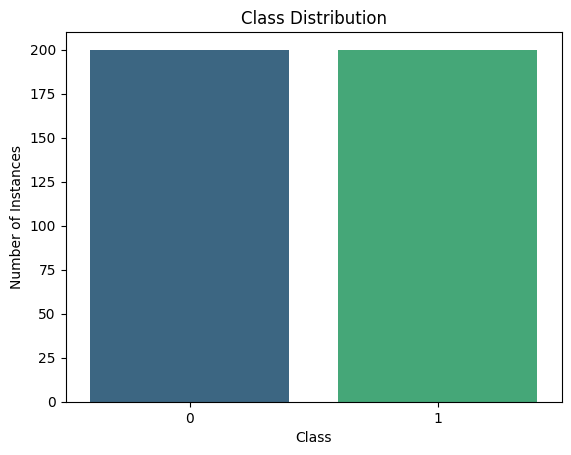

In [119]:
sn.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()

## SMOTE

SMOTE rešava problem nebalansiranih klasa generisanjem sintetičkih instanci manjinske klase. 

In [120]:
from imblearn.over_sampling import SMOTE

oversampled = SMOTE(sampling_strategy='auto', random_state=42)
X_oversampled, y_oversampled = oversampled.fit_resample(data.drop('class', axis=1), data['class'])

numericCols=data.drop(columns=["class"]).columns
dataOversampled=pd.DataFrame(X_oversampled, columns=numericCols)
dataOversampled["class"]=y_oversampled



In [121]:
class_counts = dataOversampled['class'].value_counts()
print(class_counts)

class
1    314
0    314
Name: count, dtype: int64


C:\Users\Sokol\AppData\Local\Temp\ipykernel_10912\427854912.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


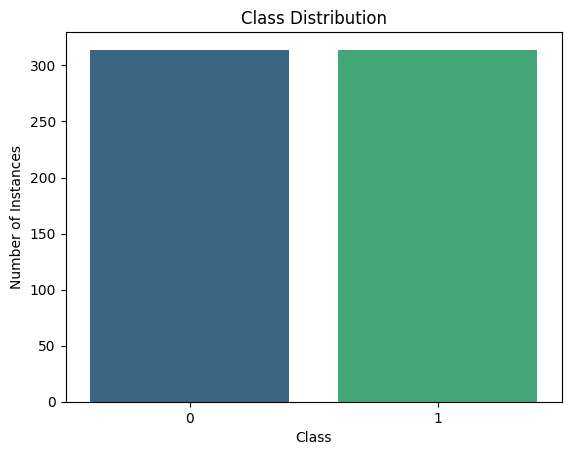

In [122]:
sn.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()

# Split data into train and test subsets


### Data

In [123]:
data

,Female,Male,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,1,-0.669817,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0,1,0.891177,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0,1,-0.583095,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0,1,-0.236208,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0,1,1.064621,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1,0,-0.756539,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,1,0,0.023958,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,1,0,0.891177,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,1,0,-1.363593,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [124]:
X_data = data.drop('class', axis=1)
y_data = data['class']
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data, test_size = 0.2, random_state = 1)
print(X_train_data.shape)
print(X_test_data.shape)
print(y_train_data.shape)
print(y_test_data.shape)

(411, 17)
(103, 17)
(411,)
(103,)


### Without min corellation features - Genital thrush, Irritability, Obesity

In [125]:
data_without_min_cor

,Age,Female,Male,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Itching,delayed healing,partial paresis,muscle stiffness,Alopecia,class
0,-0.669817,0,1,0,1,0,1,0,0,1,1,0,1,1,1
1,0.891177,0,1,0,0,0,1,0,1,0,0,1,0,1,1
2,-0.583095,0,1,1,0,0,1,1,0,1,1,0,1,1,1
3,-0.236208,0,1,0,0,1,1,1,0,1,1,0,0,0,1
4,1.064621,0,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,-0.756539,1,0,1,1,1,0,1,0,1,1,1,0,0,1
516,0.023958,1,0,1,1,1,1,1,0,1,1,1,0,0,1
517,0.891177,1,0,1,1,1,1,1,1,0,0,1,1,0,1
518,-1.363593,1,0,0,0,0,1,0,1,1,1,0,0,1,0


In [126]:
X_data_without_min_cor = data_without_min_cor.drop('class', axis=1)
y_data_without_min_cor = data_without_min_cor['class']
X_train_data_without_min_cor, X_test_data_without_min_cor, y_train_data_without_min_cor, y_test_data_without_min_cor = train_test_split(X_data_without_min_cor, y_data_without_min_cor, test_size = 0.2, random_state = 1)
print(X_train_data_without_min_cor.shape)
print(X_test_data_without_min_cor.shape)
print(y_train_data_without_min_cor.shape)
print(y_test_data_without_min_cor.shape)

(411, 14)
(103, 14)
(411,)
(103,)


### Data cleared

In [127]:
data_cleared

,Age,Female,Male,Polyuria,sudden weight loss,weakness,Polyphagia,visual blurring,Itching,delayed healing,partial paresis,muscle stiffness,Alopecia,class
0,-0.669817,0,1,0,0,1,0,0,1,1,0,1,1,1
1,0.891177,0,1,0,0,1,0,1,0,0,1,0,1,1
2,-0.583095,0,1,1,0,1,1,0,1,1,0,1,1,1
3,-0.236208,0,1,0,1,1,1,0,1,1,0,0,0,1
4,1.064621,0,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,-0.756539,1,0,1,1,0,1,0,1,1,1,0,0,1
516,0.023958,1,0,1,1,1,1,0,1,1,1,0,0,1
517,0.891177,1,0,1,1,1,1,1,0,0,1,1,0,1
518,-1.363593,1,0,0,0,1,0,1,1,1,0,0,1,0


In [128]:
X_data_cleared = data_cleared.drop('class', axis=1)
y_data_cleared = data_cleared['class']
X_train_data_cleared, X_test_data_cleared, y_train_data_cleared, y_test_data_cleared = train_test_split(X_data_cleared, y_data_cleared, test_size = 0.2, random_state = 1)
print(X_train_data_cleared.shape)
print(X_test_data_cleared.shape)
print(y_train_data_cleared.shape)
print(y_test_data_cleared.shape)

(411, 13)
(103, 13)
(411,)
(103,)


In [129]:
X_data_cleared

,Age,Female,Male,Polyuria,sudden weight loss,weakness,Polyphagia,visual blurring,Itching,delayed healing,partial paresis,muscle stiffness,Alopecia
0,-0.669817,0,1,0,0,1,0,0,1,1,0,1,1
1,0.891177,0,1,0,0,1,0,1,0,0,1,0,1
2,-0.583095,0,1,1,0,1,1,0,1,1,0,1,1
3,-0.236208,0,1,0,1,1,1,0,1,1,0,0,0
4,1.064621,0,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,-0.756539,1,0,1,1,0,1,0,1,1,1,0,0
516,0.023958,1,0,1,1,1,1,0,1,1,1,0,0
517,0.891177,1,0,1,1,1,1,1,0,0,1,1,0
518,-1.363593,1,0,0,0,1,0,1,1,1,0,0,1


### Undersampling

In [130]:
X_dataUndersampled = dataUndersampled.drop('class', axis=1)
y_dataUndersampled = dataUndersampled['class']
X_train_dataUndersampled, X_test_dataUndersampled, y_train_dataUndersampled, y_test_dataUndersampled = train_test_split(X_dataUndersampled, y_dataUndersampled, test_size = 0.2, random_state = 1)
print(X_train_dataUndersampled.shape)
print(X_test_dataUndersampled.shape)
print(y_train_dataUndersampled.shape)
print(y_test_dataUndersampled.shape)

(320, 17)
(80, 17)
(320,)
(80,)


In [131]:
X_dataUndersampled

,Female,Male,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
200,0,1,-0.669817,0,1,1,1,0,0,1,1,0,0,1,1,0,0
201,0,1,-1.710480,0,0,1,0,0,0,0,0,0,0,0,0,0,0
202,0,1,-0.929983,0,0,0,0,0,0,0,0,0,0,0,0,0,0
203,0,1,-1.190149,0,0,0,0,0,0,0,0,0,0,0,0,0,0
204,0,1,-1.537036,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,1,0,1.758397,1,1,0,1,1,0,1,1,0,1,1,0,0,0
145,0,1,1.151343,1,0,0,1,1,1,1,1,1,1,1,0,0,0
297,1,0,0.631012,1,1,1,0,1,0,0,1,0,1,1,0,0,0
0,0,1,-0.669817,0,1,0,1,0,0,0,1,0,1,0,1,1,1


### Oversampling

In [132]:
X_dataOversampled = dataOversampled.drop('class', axis=1)
y_dataOversampled= dataOversampled['class']
X_train_dataOversampled, X_test_dataOversampled, y_train_dataOversampled, y_test_dataOversampled = train_test_split(X_dataOversampled, y_dataOversampled, test_size = 0.2, random_state = 1)
print(X_train_dataOversampled.shape)
print(X_test_dataOversampled.shape)
print(y_train_dataOversampled.shape)
print(y_test_dataOversampled.shape)

(502, 17)
(126, 17)
(502,)
(126,)


In [133]:
X_dataOversampled

,Female,Male,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,0,1,-0.669817,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,0,1,0.891177,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,0,1,-0.583095,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,0,1,-0.236208,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,0,1,1.064621,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,0,1,-1.016705,0,0,0,0,0,0,0,0,0,0,0,0,0,0
624,0,1,-0.409651,0,0,0,1,0,1,0,1,0,0,0,0,1,0
625,1,0,0.284124,0,0,0,0,0,1,0,1,0,1,0,0,1,0
626,0,1,-0.236208,0,0,0,0,1,1,0,0,0,0,0,0,0,0


# Algorithams

## Confusion Matrix - function 

In [137]:
from sklearn.metrics import confusion_matrix
# 
def conf_mat(y_test, pred,name):
    # Create confusion matrix
    matrix = confusion_matrix(y_test, pred)
    # Create pandas dataframe
    df = pd.DataFrame(matrix, index=['no','yes'], columns=['no','yes'])
    # Create heatmap
    sn.heatmap(df, annot=True, cbar=None, cmap="Blues")
    plt.title("Confusion Matrix - "+name), plt.tight_layout()
    plt.ylabel("True Class"), plt.xlabel("Predicted Class")
    plt.show()

## Decision Tree Classifier



Decision tree (drvo odlučivanja) je model mašinskog učenja koji radi na principu razdvajanja podataka u određene grupe na osnovu atributa, kreirajući hijerarhijsku strukturu u obliku stabla. Algoritam počinje od korena stabla i bira atribut koji najbolje deli podatke, optimizujući neki kriterijum čistoće (npr. Gini indeks ili entropija). Podaci se zatim dele na osnovu vrednosti tog atributa, kreirajući grane stabla. Ovaj proces se rekurzivno ponavlja za svaki podskup podataka, gradeći dublje čvorove i dalje granajući stablo. Kada se postignu određeni uslovi zaustavljanja, poput maksimalne dubine ili minimuma instanci u čvoru, čvorovi postaju listovi koji predstavljaju klasifikaciju ili vrednost regresije. Kada je stablo izgrađeno, novi podaci se klasifikuju prolaskom kroz stablo od korena do odgovarajućeg lista. 

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Gini Decision Tree: 0.9611650485436893
Average Cross Validation Accuracy:  89.38%

Entropy Decision Tree: 0.9805825242718447
Average Cross Validation Accuracy:  89.33%


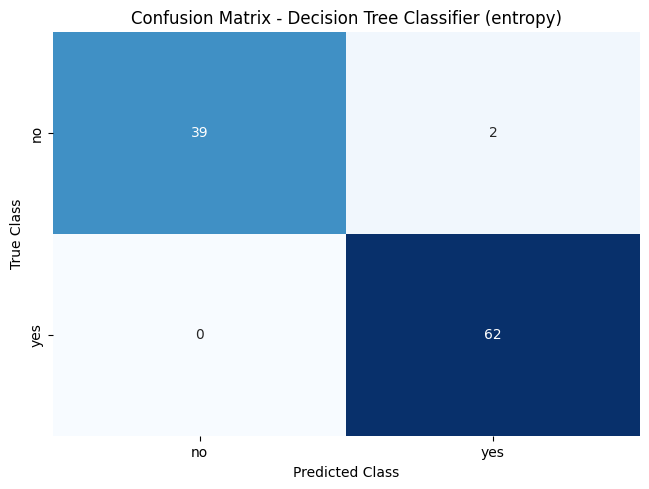

In [139]:
# all features

# Gini impurity kriterujum meri koliko često se nasumično izabrani element iz skupa pogrešno klasifikuje.
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 0).fit(X_train_data, y_train_data)
print('Gini Decision Tree:', dtree.score(X_test_data, y_test_data))
pred = dtree.predict(X_test_data)
#conf_mat(y_test_data, pred,"Decision Tree Classifier (gini)")

dtree_model=make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion = 'gini', random_state = 0))
cv=KFold(n_splits=5, shuffle=True, random_state=12)
score=cross_val_score(dtree_model, X_test_data, y_test_data, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

# Entropy meri prosecnu kolicinu informacija potrebnu za klasifikaciju (nezavisnost)
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0).fit(X_train_data, y_train_data)
print('\nEntropy Decision Tree:', dtree.score(X_test_data, y_test_data))
pred = dtree.predict(X_test_data)


dtree_model=make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion = 'entropy', random_state = 0))
score=cross_val_score(dtree_model, X_test_data, y_test_data, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

conf_mat(y_test_data, pred,"Decision Tree Classifier (entropy)")

In [140]:
# features without min
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 0).fit(X_train_data_without_min_cor, y_train_data_without_min_cor)
print('Gini Decision Tree:', dtree.score(X_test_data_without_min_cor, y_test_data_without_min_cor))
pred = dtree.predict(X_test_data_without_min_cor)
#conf_mat(y_test_data_without_min_cor, pred, "Decision Tree Classifier (gini)")

dtree_model=make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion = 'gini', random_state = 0))
score=cross_val_score(dtree_model, X_test_data_without_min_cor, y_test_data_without_min_cor, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

dtree_best = DecisionTreeClassifier(criterion = 'entropy', random_state = 0).fit(X_train_data_without_min_cor, y_train_data_without_min_cor)
print('\nEntropy Decision Tree:', dtree_best.score(X_test_data_without_min_cor, y_test_data_without_min_cor))
pred = dtree_best.predict(X_test_data_without_min_cor)
#conf_mat(y_test_data_without_min_cor, pred,"Decision Tree Classifier (entropy)")
dtree_model=make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion = 'entropy', random_state = 0))
score=cross_val_score(dtree_model, X_test_data_without_min_cor, y_test_data_without_min_cor, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

Gini Decision Tree: 0.9611650485436893
Average Cross Validation Accuracy:  87.38%

Entropy Decision Tree: 0.970873786407767
Average Cross Validation Accuracy:  87.38%


In [141]:
# data cleared
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 0).fit(X_train_data_cleared, y_train_data_cleared)
print('Gini Decision Tree:', dtree.score(X_test_data_cleared, y_test_data_cleared))
pred = dtree.predict(X_test_data_cleared)
# conf_mat(y_test_data_cleared, pred, "Decision Tree Classifier (gini)")
dtree_model=make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion = 'gini', random_state = 0))
score=cross_val_score(dtree_model, X_test_data_cleared, y_test_data_cleared, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0).fit(X_train_data_cleared, y_train_data_cleared)
print('\nEntropy Decision Tree:', dtree.score(X_test_data_cleared, y_test_data_cleared))
pred = dtree.predict(X_test_data_cleared)
# conf_mat(y_test_data_cleared, pred,"Decision Tree Classifier (entropy)")
dtree_model=make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion = 'entropy', random_state = 0))
score=cross_val_score(dtree_model, X_test_data_cleared, y_test_data_cleared, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

Gini Decision Tree: 0.9514563106796117
Average Cross Validation Accuracy:  86.52%

Entropy Decision Tree: 0.9320388349514563
Average Cross Validation Accuracy:  83.52%


In [142]:
# balanced dataset - Undersampling
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 0).fit(X_train_dataUndersampled, y_train_dataUndersampled)
print('Gini Decision Tree:', dtree.score(X_test_dataUndersampled, y_test_dataUndersampled))
pred = dtree.predict(X_test_dataUndersampled)
#conf_mat(y_test_dataUndersampled, pred, "Decision Tree Classifier (gini)")
dtree_model=make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion = 'gini', random_state = 0))
score=cross_val_score(dtree_model, X_test_dataUndersampled, y_test_dataUndersampled, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0).fit(X_train_dataUndersampled, y_train_dataUndersampled)
print('\nEntropy Decision Tree:', dtree.score(X_test_dataUndersampled, y_test_dataUndersampled))
pred = dtree.predict(X_test_dataUndersampled)
#conf_mat(y_test_dataUndersampled, pred,"Decision Tree Classifier (entropy)")
dtree_model=make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion = 'entropy', random_state = 0))
score=cross_val_score(dtree_model, X_test_dataUndersampled, y_test_dataUndersampled, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

Gini Decision Tree: 0.95
Average Cross Validation Accuracy:  85.00%

Entropy Decision Tree: 0.9375
Average Cross Validation Accuracy:  85.00%


Gini Decision Tree: 0.9523809523809523
Average Cross Validation Accuracy:  92.80%

Entropy Decision Tree: 0.9841269841269841
Average Cross Validation Accuracy:  92.06%


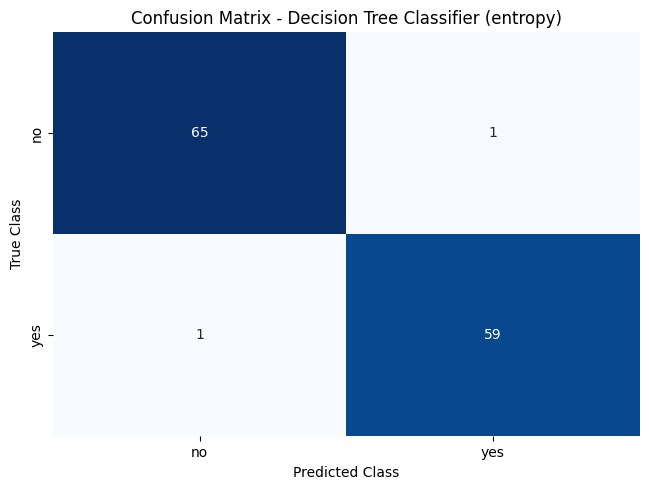

In [143]:
# balanced dataset - Oversampling
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 0).fit(X_train_dataOversampled, y_train_dataOversampled)
print('Gini Decision Tree:', dtree.score(X_test_dataOversampled, y_test_dataOversampled))
pred = dtree.predict(X_test_dataOversampled)
#conf_mat(y_test_dataOversampled, pred, "Decision Tree Classifier (gini)")

dtree_model=make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion = 'gini', random_state = 0))
score=cross_val_score(dtree_model, X_test_dataOversampled, y_test_dataOversampled, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")


dtree= DecisionTreeClassifier(criterion = 'entropy', random_state = 0).fit(X_train_dataOversampled, y_train_dataOversampled)
print('\nEntropy Decision Tree:', dtree.score(X_test_dataOversampled, y_test_dataOversampled))
pred = dtree.predict(X_test_dataOversampled)

dtree_model=make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion = 'entropy', random_state = 0))
score=cross_val_score(dtree_model, X_test_dataOversampled, y_test_dataOversampled, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")
conf_mat(y_test_dataOversampled, pred,"Decision Tree Classifier (entropy)")

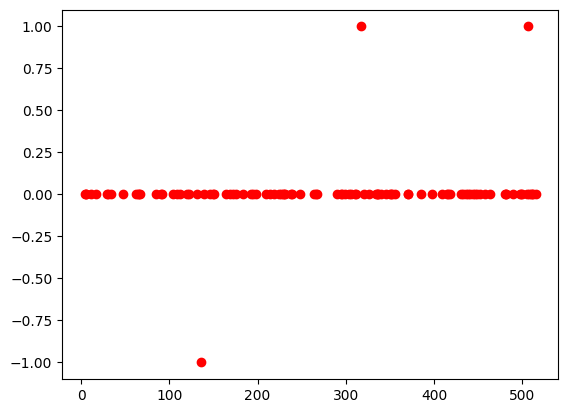

In [144]:
pred = dtree_best.predict(X_test_data_without_min_cor)
plt.plot(pred - y_test_data_without_min_cor, 'ro')

In [145]:
diff = (pred - y_test_data_without_min_cor)
diff[diff != 0]

317    1
136   -1
507    1
Name: class, dtype: int64

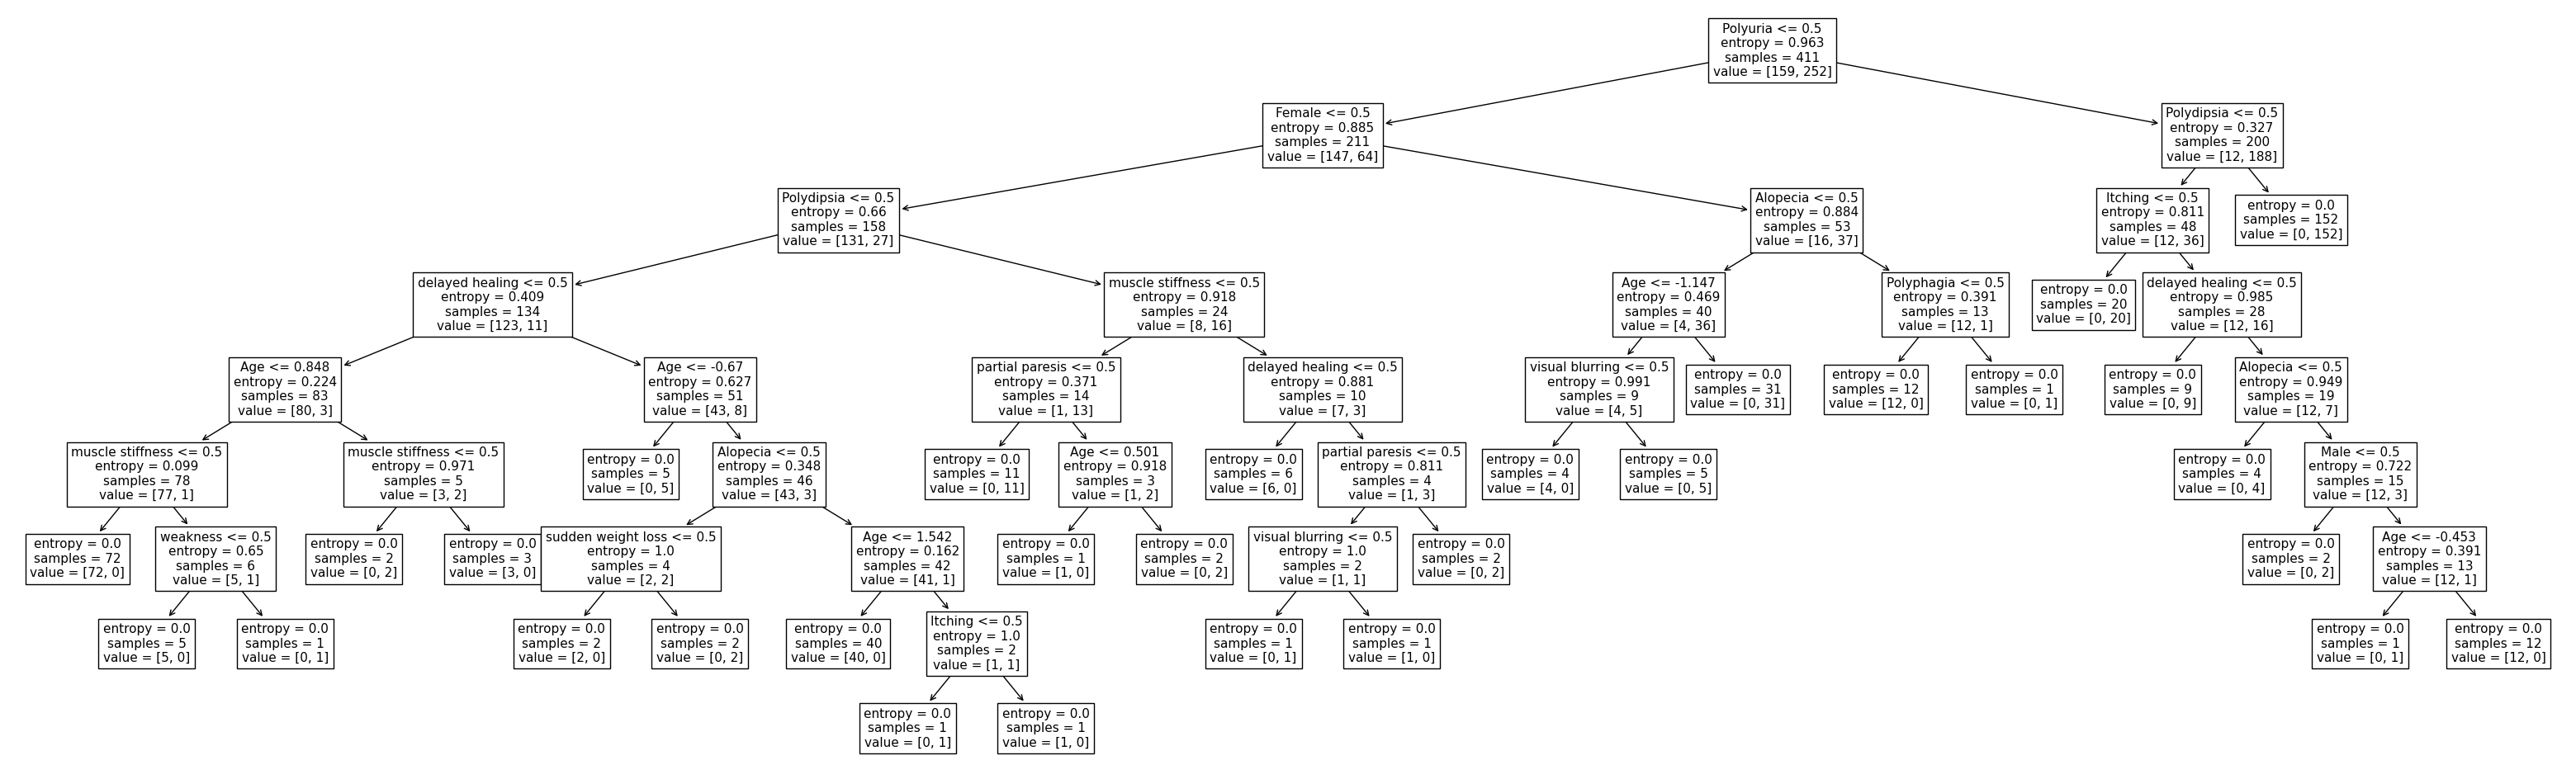

In [146]:
from sklearn import tree

feature_names = list(X_data_without_min_cor.columns)

fig, ax = plt.subplots(figsize=(40, 12))
tree.plot_tree(dtree_best, feature_names=feature_names, fontsize=11)
plt.show()


## Random Forest Classifier


Random Forest je klasifikator koji sadrži više stabala odlučivanja na različitim podskupovima dataskupa i uzima prosečnu vrednost kako bi poboljšao prediktivnu tačnost tog skupa podataka. Umesto oslanjanja samo na jedno stablo odlučivanja, Random Forest uzima predviđanja svakog stabla i, na osnovu većinske podrške tih predviđanja, daje konačni izlaz. Veći broj stabala u šumi dovodi do veće tačnosti i sprečava problem preprilagođavanja (overfittinga).

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
# All features
forest = RandomForestClassifier(random_state = 0, n_jobs = -1).fit(X_train_data, y_train_data)
print(forest.score(X_test_data, y_test_data))
pred=forest.predict(X_test_data)

dtree_model=make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 0, n_jobs = -1))
score=cross_val_score(dtree_model, X_test_data, y_test_data, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

#conf_mat(y_test_data, pred,"Random Forest Classifier")

0.970873786407767
Average Cross Validation Accuracy:  90.29%


In [149]:
# features without min
forest = RandomForestClassifier(random_state = 0, n_jobs = -1).fit(X_train_data_without_min_cor, y_train_data_without_min_cor)
print(forest.score(X_test_data_without_min_cor, y_test_data_without_min_cor))
pred=forest.predict(X_test_data_without_min_cor)

dtree_model=make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 0, n_jobs = -1))
score=cross_val_score(dtree_model, X_test_data_without_min_cor, y_test_data, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")


#conf_mat(y_test_data_without_min_cor, pred, "Random Forest Classifier")


0.970873786407767
Average Cross Validation Accuracy:  92.24%


In [150]:
# data cleared
forest = RandomForestClassifier(random_state = 0, n_jobs = -1).fit(X_train_data_cleared, y_train_data_cleared)
print(forest.score(X_test_data_cleared, y_test_data_cleared))
pred=forest.predict(X_test_data_cleared)

dtree_model=make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 0, n_jobs = -1))
score=cross_val_score(dtree_model, X_test_data_cleared, y_test_data_cleared, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

#conf_mat(y_test_data_cleared, pred, "Random Forest Classifier")

0.9611650485436893
Average Cross Validation Accuracy:  88.38%


In [151]:
# Undersampling
forest = RandomForestClassifier(random_state = 0, n_jobs = -1).fit(X_train_dataUndersampled, y_train_dataUndersampled)
print(forest.score(X_test_dataUndersampled, y_test_dataUndersampled))
pred=forest.predict(X_test_dataUndersampled)

dtree_model=make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 0, n_jobs = -1).fit(X_train_dataUndersampled, y_train_dataUndersampled))
score=cross_val_score(dtree_model, X_test_dataUndersampled, y_test_dataUndersampled, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")


#conf_mat(y_test_dataUndersampmled, pred, "Random Forest Classifier")

0.9625
Average Cross Validation Accuracy:  86.25%


0.9841269841269841
Average Cross Validation Accuracy:  93.66%


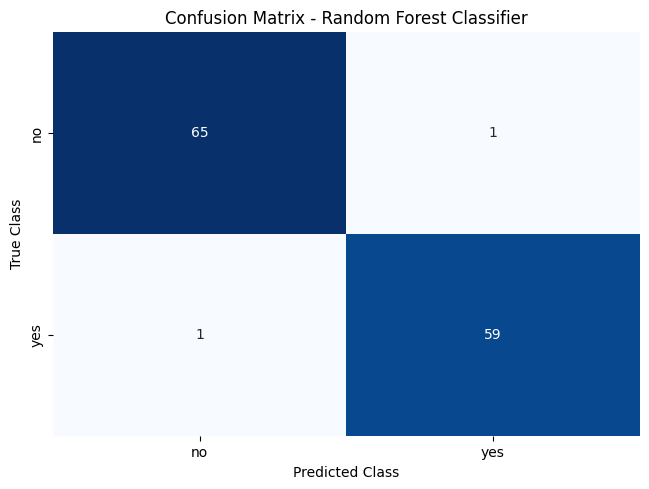

In [152]:
# Oversampling
forest = RandomForestClassifier(random_state = 0, n_jobs = -1).fit(X_train_dataOversampled, y_train_dataOversampled)
print(forest.score(X_test_dataOversampled, y_test_dataOversampled))
pred=forest.predict(X_test_dataOversampled)

dtree_model=make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 0, n_jobs = -1).fit(X_train_dataOversampled, y_train_dataOversampled))
score=cross_val_score(dtree_model, X_test_dataOversampled, y_test_dataOversampled, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")



conf_mat(y_test_dataOversampled, pred, "Random Forest Classifier")

## Balanced classes for Random Forest


Kada postavite class_weight na "balanced", algoritam automatski pridaje veću težinu manje zastupljenim klasama, čime se smanjuje uticaj neravnoteže klasa na krajnji rezultat modela.

In [153]:
# All features
forestBalanced = RandomForestClassifier(random_state = 0, n_jobs = -1, class_weight = "balanced").fit(X_train_data, y_train_data)
print(forestBalanced.score(X_test_data, y_test_data))
pred = forestBalanced.predict(X_test_data)

dtree_model=make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 0, n_jobs = -1, class_weight = "balanced").fit(X_train_data, y_train_data))
cv=KFold(n_splits=5, shuffle=True, random_state=12)
score=cross_val_score(dtree_model, X_test_data, y_test_data, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

#conf_mat(y_test_data, pred,"Balanced classes for Random Forest")

0.970873786407767
Average Cross Validation Accuracy:  91.24%


In [154]:
# features without min
forestBalanced = RandomForestClassifier(random_state = 0, n_jobs = -1, class_weight = "balanced").fit(X_train_data_without_min_cor, y_train_data_without_min_cor)
print(forestBalanced.score(X_test_data_without_min_cor, y_test_data_without_min_cor))
pred = forestBalanced.predict(X_test_data_without_min_cor)

dtree_model=make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 0, n_jobs = -1, class_weight = "balanced"))
score=cross_val_score(dtree_model, X_test_data_without_min_cor, y_test_data_without_min_cor, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

#conf_mat(y_test_data_without_min_cor, pred, "Balanced classes for Random Forest")

0.970873786407767
Average Cross Validation Accuracy:  91.24%


In [155]:
# data cleared
forestBalanced = RandomForestClassifier(random_state = 0, n_jobs = -1, class_weight = "balanced").fit(X_train_data_cleared, y_train_data_cleared)
print(forestBalanced.score(X_test_data_cleared, y_test_data_cleared))
pred = forestBalanced.predict(X_test_data_cleared)

dtree_model=make_pipeline(StandardScaler(), RandomForestClassifier(random_state = 0, n_jobs = -1, class_weight = "balanced"))
score=cross_val_score(dtree_model, X_test_data_cleared, y_test_data_cleared, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

#conf_mat(y_test_data_cleared, pred, "Balanced classes for Random Forest")

0.9611650485436893
Average Cross Validation Accuracy:  87.43%


## Improving Performance Through Boosting

In [156]:
from sklearn.ensemble import AdaBoostClassifier

### AdaBoostClassifier

AdaBoost (Adaptive Boosting) je ensemble metoda. Osnovna ideja AdaBoost-a je fokusirati se na instance koje su pogrešno klasifikovane od strane prethodnih klasifikatora i dodeliti im veće težine, čime se omogućava narednom klasifikatoru da se fokusira na te teže instance. Na taj način, AdaBoost daje veću pažnju onim podacima koji su teže za klasifikaciju, čime se postiže bolja generalizacija.

In [157]:
# All features
adaboost = AdaBoostClassifier(random_state = 1, learning_rate = 1).fit(X_train_data, y_train_data)
print(adaboost.score(X_test_data, y_test_data))
pred = adaboost.predict(X_test_data)

dtree_model=make_pipeline(StandardScaler(), AdaBoostClassifier(random_state = 1, learning_rate = 1).fit(X_train_data, y_train_data))
cv=KFold(n_splits=5, shuffle=True, random_state=12)
score=cross_val_score(dtree_model, X_test_data, y_test_data, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

#onf_mat(y_test_data, pred,"Improving Performance Through Ada Boost Classifier")

0.9223300970873787
Average Cross Validation Accuracy:  87.43%


In [158]:
# features without min
adaboost = AdaBoostClassifier(random_state = 0, learning_rate = 1).fit(X_train_data_without_min_cor, y_train_data_without_min_cor)
print(adaboost.score(X_test_data_without_min_cor, y_test_data_without_min_cor))
pred = adaboost.predict(X_test_data_without_min_cor)

dtree_model=make_pipeline(StandardScaler(), AdaBoostClassifier(random_state = 0, learning_rate = 1).fit(X_train_data_without_min_cor, y_train_data_without_min_cor))
score=cross_val_score(dtree_model, X_test_data_without_min_cor, y_test_data_without_min_cor, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

#conf_mat(y_test_data_without_min_cor, pred, "Improving Performance Through Boosting")

0.9223300970873787
Average Cross Validation Accuracy:  88.38%


In [159]:
# data cleared
adaboost = AdaBoostClassifier(random_state = 0, learning_rate = 0.9).fit(X_train_data_cleared, y_train_data_cleared)
print(adaboost.score(X_test_data_cleared, y_test_data_cleared))
pred = adaboost.predict(X_test_data_cleared)

dtree_model=make_pipeline(StandardScaler(), AdaBoostClassifier(random_state = 0, learning_rate = 0.9).fit(X_train_data_cleared, y_train_data_cleared))
score=cross_val_score(dtree_model, X_test_data_cleared, y_test_data_cleared, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

#conf_mat(y_test_data_cleared, pred, "Improving Performance Through Boosting")

0.8737864077669902
Average Cross Validation Accuracy:  84.57%


In [160]:
# Undersampling
adaboost = AdaBoostClassifier(random_state = 0, learning_rate = 0.9).fit(X_train_dataUndersampled, y_train_dataUndersampled)
print(adaboost.score(X_test_dataUndersampled, y_test_dataUndersampled))
pred = adaboost.predict(X_test_dataUndersampled)

dtree_model=make_pipeline(StandardScaler(), AdaBoostClassifier(random_state = 0, learning_rate = 0.9).fit(X_train_dataUndersampled, y_train_dataUndersampled))
score=cross_val_score(dtree_model, X_test_dataUndersampled, y_test_dataUndersampled, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

#conf_mat(y_test_dataUndersampled, pred, "Improving Performance Through Boosting")

0.8875
Average Cross Validation Accuracy:  85.00%


0.9206349206349206
Average Cross Validation Accuracy:  93.60%


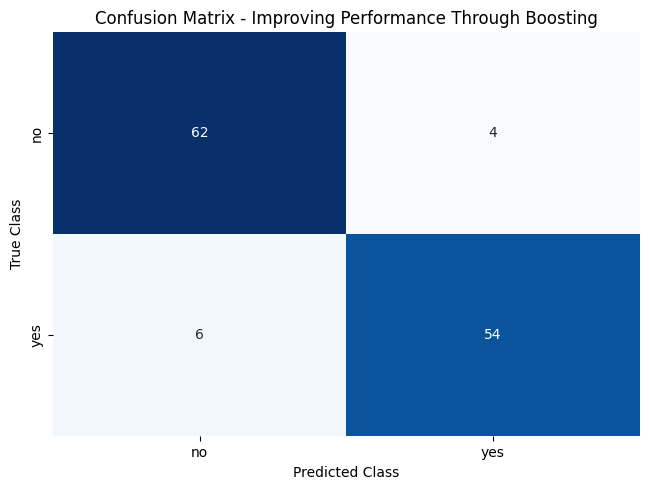

In [161]:
# Undersampling
adaboost = AdaBoostClassifier(random_state = 0, learning_rate = 0.9).fit(X_train_dataOversampled, y_train_dataOversampled)
print(adaboost.score(X_test_dataOversampled, y_test_dataOversampled))
pred = adaboost.predict(X_test_dataOversampled)

dtree_model=make_pipeline(StandardScaler(), AdaBoostClassifier(random_state = 0, learning_rate = 0.9).fit(X_train_dataOversampled, y_train_dataOversampled))
score=cross_val_score(dtree_model, X_test_dataOversampled, y_test_dataOversampled, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")


conf_mat(y_test_dataOversampled, pred, "Improving Performance Through Boosting")

### Gradient Boosting Clasificator

Gradient Boosting je ensemble metoda. Osnovna ideja ovog pristupa je kombinovanje više slabih modela (obično dstablarveća odlučivanja) kako bi se postigao jači i robusniji model. Gradient Boosting je iterativni proces u kojem se svaki novi model gradi kako bi korigovao greške prethodnih modela. Svaki novi model fokusira se na preostale greške prethodnih modela. Koristi se gradijentni pristup minimizacije funkcije gubitka (loss function). Gradijent gubitka računa se u odnosu na predikcije modela, a novi model se dodaje u ansambl kako bi se minimizovala ta greška.

In [162]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

1.0
Average Cross Validation Accuracy:  88.38%


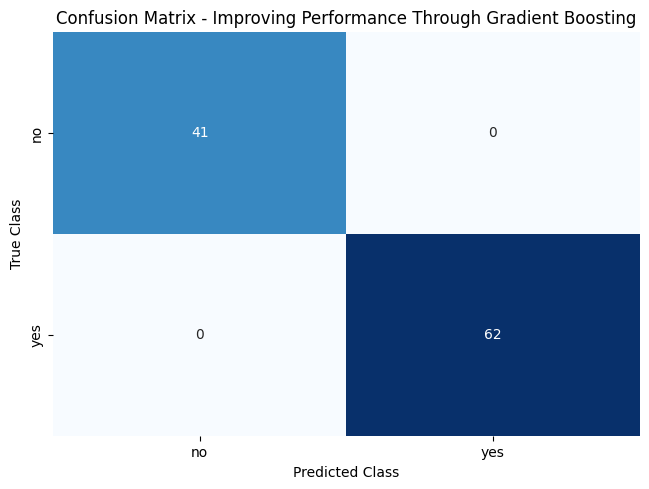

In [163]:
gbc = GradientBoostingClassifier(n_estimators=100)

gbc.fit(X_data, y_data)
print(gbc.score(X_test_data, y_test_data))
pred = gbc.predict(X_test_data)

dtree_model=make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=100))
cv=KFold(n_splits=5, shuffle=True, random_state=12)
score=cross_val_score(dtree_model, X_test_data, y_test_data, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

conf_mat(y_test_data, pred,"Improving Performance Through Gradient Boosting")

### Bagging Classifier 

Bagging klasifikator je ansambl metoda u mašinskom učenju koja koristi više instanci istog klasifikatora, svaka trenirana na različitom podskupu trening podataka. Ova metoda se oslanja na uzorkovanje s ponavljanjem (Bootstrap uzorkovanje) kako bi se stvorili različiti podskupovi. Nakon treninga, predviđanja svake instance klasifikatora se kombinuju, često koristeći glasanje, kako bi se postigla konačna klasifikacija.

In [164]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

0.941747572815534


Average Cross Validation Accuracy:  85.57%


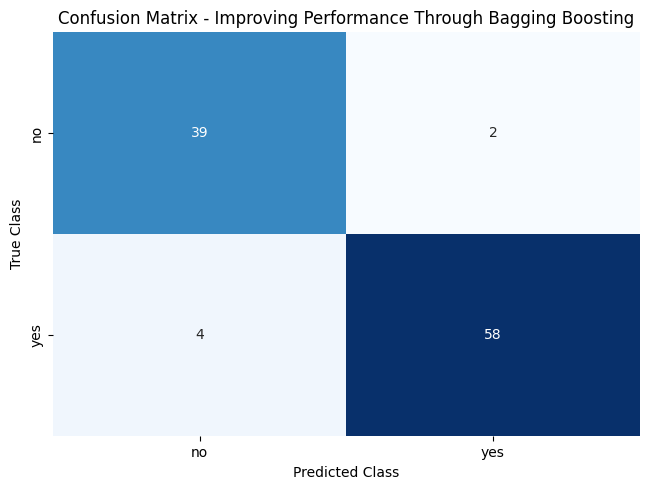

In [165]:
bagging_classifier = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=10, random_state=42).fit(X_data, y_data)
print(bagging_classifier.score(X_test_data, y_test_data))
pred = bagging_classifier.predict(X_test_data)
pred

dtree_model=make_pipeline(StandardScaler(), BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=10, random_state=42))
cv=KFold(n_splits=5, shuffle=True, random_state=12)
score=cross_val_score(dtree_model, X_test_data, y_test_data, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

conf_mat(y_test_data, pred,"Improving Performance Through Bagging Boosting")

### XGBoost

XGBoost je ansambl metoda u mašinskom učenju. Koristi boosting pristup, trenirajući seriju drveta odlučivanja iterativno, pri čemu svako naredno drvo koriguje greške prethodnog.

0.9902912621359223
Average Cross Validation Accuracy:  89.33%


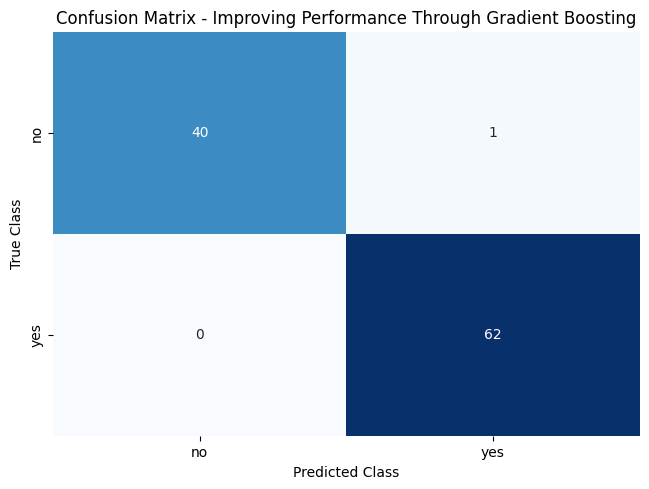

In [166]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180).fit(X_data, y_data)
print(xgb.score(X_test_data, y_test_data))
pred = xgb.predict(X_test_data)

dtree_model=make_pipeline(StandardScaler(), XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180))
cv=KFold(n_splits=5, shuffle=True, random_state=12)
score=cross_val_score(dtree_model, X_test_data, y_test_data, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

conf_mat(y_test_data, pred,"Improving Performance Through Gradient Boosting")

## K-Nearest Neighbors

Tokom faze obuke, model pamti trening podatke. Kada se pojavi novi podatak za klasifikaciju, algoritam računa rastojanja između tog podatka i svih trening instanci. Zatim, odabira k najbližih suseda i primenjuje "glasanje većine" da odredi klasu novog podatka. 

In [167]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [168]:
# Create standardizer
standardizer = StandardScaler()
# Standardize features
data_std = standardizer.fit_transform(data_cleared)
data_std

array([[-0.66981721, -0.76578049,  0.76578049, ...,  1.30042281,
         1.37983869,  0.79808688],
       [ 0.89117746, -0.76578049,  0.76578049, ..., -0.76898067,
         1.37983869,  0.79808688],
       [-0.58309529, -0.76578049,  0.76578049, ...,  1.30042281,
         1.37983869,  0.79808688],
       ...,
       [ 0.89117746,  1.30585725, -1.30585725, ...,  1.30042281,
        -0.7247224 ,  0.79808688],
       [-1.36359262,  1.30585725, -1.30585725, ..., -0.76898067,
         1.37983869, -1.25299641],
       [-0.49637336, -0.76578049,  0.76578049, ..., -0.76898067,
        -0.7247224 , -1.25299641]])

In [169]:
X_std = data_std[:,:-1]
y_std = data_std[:,-1]
y_std = data_cleared['class']
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y_std, test_size = 0.2, random_state = 0)

In [170]:
#koristiti najbliži sused za donošenje odluka.
#Omogućava paralelno izvršavanje prilikom treniranja modela
knn = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1).fit(X_train_data, y_train_data)
print(knn.score(X_test_data, y_test_data))
pred = knn.predict(X_test_data)

dtree_model=make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 1, n_jobs = -1))
cv=KFold(n_splits=5, shuffle=True, random_state=12)
score=cross_val_score(dtree_model, X_test_data, y_test_data, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

#conf_mat(y_test_data, pred,"K-Nearest Neighbors")

0.941747572815534
Average Cross Validation Accuracy:  88.52%


0.970873786407767
Average Cross Validation Accuracy:  88.43%


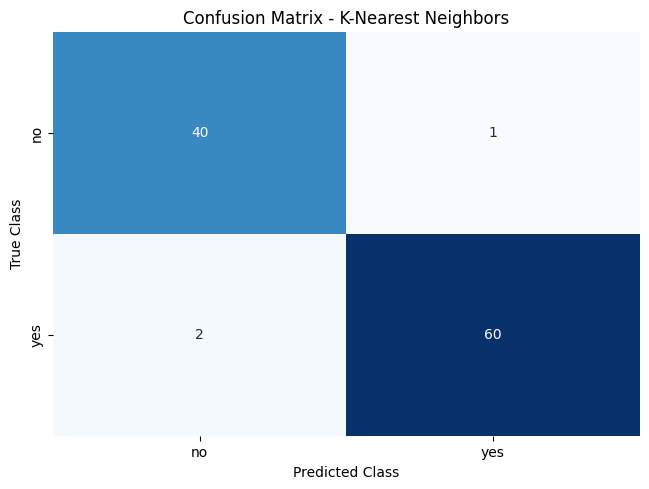

In [171]:
# features without min
knn = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1).fit(X_train_data_without_min_cor, y_train_data_without_min_cor)
print(knn.score(X_test_data_without_min_cor, y_test_data_without_min_cor))
pred = knn.predict(X_test_data_without_min_cor)

dtree_model=make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 1, n_jobs = -1))
score=cross_val_score(dtree_model, X_test_data_without_min_cor, y_test_data_without_min_cor, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

conf_mat(y_test_data_without_min_cor, pred,"K-Nearest Neighbors")

In [172]:
# data cleared
knn = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1).fit(X_train_data_cleared, y_train_data_cleared)
print(knn.score(X_test_data_cleared, y_test_data_cleared))
pred = knn.predict(X_test_data_cleared)

dtree_model=make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion = 'gini', random_state = 0))
cv=KFold(n_splits=5, shuffle=True, random_state=12)
score=cross_val_score(dtree_model, X_test_data_cleared, y_test_data_cleared, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")


#conf_mat(y_test_data_cleared, pred, "K-Nearest Neighbors")

0.9514563106796117
Average Cross Validation Accuracy:  86.52%


In [173]:
# Undersampled
knn = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1).fit(X_train_dataUndersampled, y_train_dataUndersampled)
print(knn.score(X_test_dataUndersampled, y_test_dataUndersampled))
pred = knn.predict(X_test_dataUndersampled)

dtree_model=make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 1, n_jobs = -1))
score=cross_val_score(dtree_model, X_test_dataUndersampled, y_test_dataUndersampled, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")


#conf_mat(y_test_dataUndersampled, pred, "K-Nearest Neighbors")

0.9125
Average Cross Validation Accuracy:  86.25%


In [174]:
# Oversampled
knn = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1).fit(X_train_dataOversampled, y_train_dataOversampled)
print(knn.score(X_test_dataOversampled, y_test_dataOversampled))
pred = knn.predict(X_test_dataOversampled)

dtree_model=make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 1, n_jobs = -1))
score=cross_val_score(dtree_model, X_test_dataOversampled, y_test_dataOversampled, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")


#conf_mat(y_test_dataUndersampled, pred, "K-Nearest Neighbors")

0.9523809523809523
Average Cross Validation Accuracy:  90.43%


## Logistic Regression

 Cilj je pronaći linearnu prilagodbu podacima minimizacijom kvadratne razlike između stvarnih i predviđenih vrednosti. Model se obučava određivanjem optimalnih vrednosti za nagib pravca i osečak na y-osi. 

In [175]:
from sklearn.linear_model import LogisticRegression

In [176]:
# all features
logistic_regression = LogisticRegression(penalty='l2', C=1, random_state=0, n_jobs=-1, class_weight="balanced").fit(X_train_data, y_train_data)
print(logistic_regression.score(X_test_data, y_test_data))
pred = logistic_regression.predict(X_test_data)

dtree_model=make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', C=1, random_state=0, n_jobs=-1, class_weight="balanced"))
cv=KFold(n_splits=5, shuffle=True, random_state=12)
score=cross_val_score(dtree_model, X_test_data, y_test_data, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

#conf_mat(y_test_data, pred)

0.9223300970873787
Average Cross Validation Accuracy:  89.38%


In [177]:
# features without min
logistic_regression = LogisticRegression(penalty='l2', C=1, random_state=0, n_jobs=-1, class_weight="balanced").fit(X_train_data_without_min_cor, y_train_data_without_min_cor)
print(logistic_regression.score(X_test_data_without_min_cor, y_test_data_without_min_cor))
pred = logistic_regression.predict(X_test_data_without_min_cor)

dtree_model=make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', C=1, random_state=0, n_jobs=-1, class_weight="balanced"))
score=cross_val_score(dtree_model, X_test_data_without_min_cor, y_test_data_without_min_cor, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

#conf_mat(y_test_data_without_min_cor, pred,"Logistic Regression")

0.9320388349514563
Average Cross Validation Accuracy:  89.38%


In [178]:
# data cleared
logistic_regression = LogisticRegression(penalty='l2', C=1, random_state=0, n_jobs=-1, class_weight="balanced").fit(X_train_data_cleared, y_train_data_cleared)
print(logistic_regression.score(X_test_data_cleared, y_test_data_cleared))
pred = logistic_regression.predict(X_test_data_cleared)

dtree_model=make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', C=1, random_state=0, n_jobs=-1, class_weight="balanced"))
score=cross_val_score(dtree_model, X_test_data_cleared, y_test_data_cleared, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

#conf_mat(y_test_data_cleared, pred,"Logistic Regression")

0.8349514563106796
Average Cross Validation Accuracy:  86.38%


In [179]:
# Undersampling
logistic_regression = LogisticRegression(penalty='l2', C=1, random_state=0, n_jobs=-1, class_weight="balanced").fit(X_train_dataUndersampled, y_train_dataUndersampled)
print(logistic_regression.score(X_test_dataUndersampled, y_test_dataUndersampled))
pred = logistic_regression.predict(X_test_dataUndersampled)

dtree_model=make_pipeline(StandardScaler(),LogisticRegression(penalty='l2', C=1, random_state=0, n_jobs=-1, class_weight="balanced"))
score=cross_val_score(dtree_model, X_test_dataUndersampled, y_test_dataUndersampled, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")


#conf_mat(y_test_dataUndersampled, pred,"Logistic Regression")

0.9
Average Cross Validation Accuracy:  88.75%


0.9523809523809523


Average Cross Validation Accuracy:  92.06%


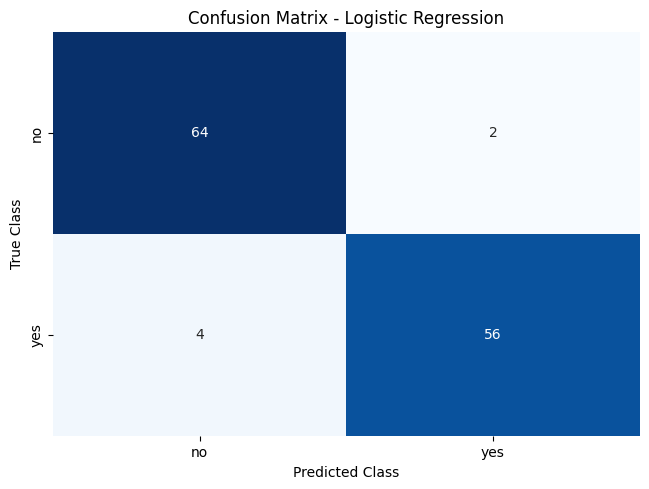

In [180]:
# Oversampling
logistic_regression = LogisticRegression(penalty='l2', C=1, random_state=0, n_jobs=-1, class_weight="balanced").fit(X_train_dataOversampled, y_train_dataOversampled)
print(logistic_regression.score(X_test_dataOversampled, y_test_dataOversampled))
pred = logistic_regression.predict(X_test_dataOversampled)

dtree_model=make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', C=1, random_state=0, n_jobs=-1, class_weight="balanced"))
score=cross_val_score(dtree_model, X_test_dataOversampled, y_test_dataOversampled, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")



conf_mat(y_test_dataOversampled, pred,"Logistic Regression")

## Support Vector Machines

Support Vector Machine (SVM) je supervizirani algoritam za mašinsko učenje. Osnovni cilj SVM algoritma je pronaći optimalnu hiper-ravan u N-dimenzionalnom prostoru koja može razdvojiti tačke podataka u različite klase u prostoru karakteristika. Hiper-ravan nastoji da marginu između najbližih tačaka različitih klasa učini što većom. Dimenzije hiper-ravni zavise od broja karakteristika. Ako je broj ulaznih karakteristika dva, hiper-ravan je samo linija. Ako je broj ulaznih karakteristika tri, hiper-ravan postaje 2D ravan. 

In [181]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [182]:
# all features
svc = SVC(kernel="rbf", gamma=1, C=100, random_state=0)
svc_model_data = svc.fit(X_train_data, y_train_data)
print(svc_model_data.score(X_test_data, y_test_data))
pred = svc_model_data.predict(X_test_data)

dtree_model=make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=1, C=100, random_state=0))
cv=KFold(n_splits=5, shuffle=True, random_state=12)
score=cross_val_score(dtree_model, X_test_data, y_test_data, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")


#conf_mat(y_test_data, pred, "SVC")

0.970873786407767
Average Cross Validation Accuracy:  78.62%


In [183]:
# features without min
svc = SVC(kernel="rbf", gamma=1, C=100, random_state=0)
svc_model_data_without_min_cor = svc.fit(X_train_data_without_min_cor, y_train_data_without_min_cor)
print(svc_model_data_without_min_cor.score(X_test_data_without_min_cor, y_test_data_without_min_cor))
pred = svc_model_data_without_min_cor.predict(X_test_data_without_min_cor)

dtree_model=make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=1, C=100, random_state=0))
score=cross_val_score(dtree_model, X_test_data_without_min_cor, y_test_data_without_min_cor, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

#conf_mat(y_test_data_without_min_cor, pred,  "SVC")

0.970873786407767
Average Cross Validation Accuracy:  81.57%


In [184]:
# data cleared
svc = SVC(kernel="rbf", gamma=1, C=100, random_state=0)
svc_model_data_cleared = svc.fit(X_train_data_cleared, y_train_data_cleared)
print(svc_model_data_cleared.score(X_test_data_cleared, y_test_data_cleared))
pred = svc_model_data_cleared.predict(X_test_data_cleared)

dtree_model=make_pipeline(StandardScaler(),SVC(kernel="rbf", gamma=1, C=100, random_state=0))
score=cross_val_score(dtree_model, X_test_data_cleared, y_test_data_cleared, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

#conf_mat(y_test_data_cleared, pred,  "SVC")

0.9514563106796117
Average Cross Validation Accuracy:  79.67%


In [185]:
# Undersampling
svc = SVC(kernel="rbf", gamma=1, C=100, random_state=0)
svc_model_dataUndersamoled = svc.fit(X_train_dataUndersampled, y_train_dataUndersampled)
print(svc_model_dataUndersamoled.score(X_test_dataUndersampled, y_test_dataUndersampled))
pred = svc_model_dataUndersamoled.predict(X_test_dataUndersampled)

dtree_model=make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=1, C=100, random_state=0))
score=cross_val_score(dtree_model, X_test_dataUndersampled, y_test_dataUndersampled, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

#conf_mat(y_test_data_cleared, pred,  "SVC")

0.9875
Average Cross Validation Accuracy:  76.25%


0.9920634920634921
Average Cross Validation Accuracy:  92.80%


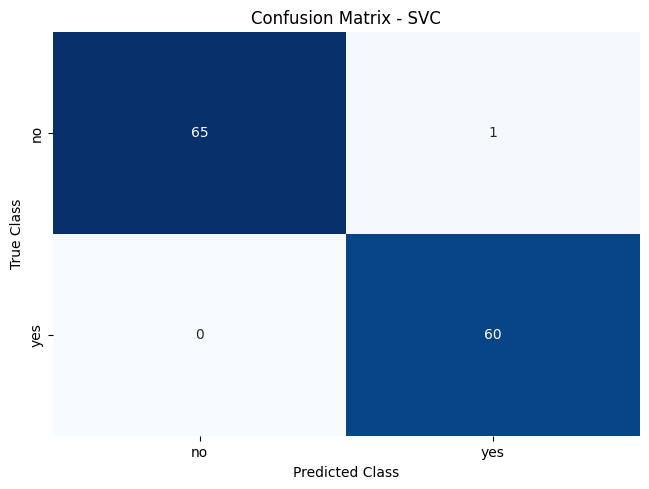

In [186]:
# Oversampling
svc = SVC(kernel="rbf", gamma=1, C=100, random_state=0)
svc_model_dataOversampled = svc.fit(X_train_dataOversampled, y_train_dataOversampled)
print(svc_model_dataOversampled.score(X_test_dataOversampled, y_test_dataOversampled))
pred = svc_model_dataOversampled.predict(X_test_dataOversampled)

dtree_model=make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion = 'gini', random_state = 0))
score=cross_val_score(dtree_model, X_test_dataOversampled, y_test_dataOversampled, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

conf_mat(y_test_dataOversampled, pred,  "SVC")

## Training a Classifier for Continuous Features

In [187]:
from sklearn.naive_bayes import GaussianNB

In [188]:
# all features
classifer = GaussianNB().fit(X_train_data, y_train_data)
print(classifer.score(X_test_data, y_test_data))
pred = svc_model_data.predict(X_test_data)

dtree_model=make_pipeline(StandardScaler(), GaussianNB())
cv=KFold(n_splits=5, shuffle=True, random_state=12)
score=cross_val_score(dtree_model, X_test_data, y_test_data, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

#conf_mat(y_test_data, pred, "GaussianNB")

0.8932038834951457
Average Cross Validation Accuracy:  87.43%


In [189]:
# features without min
classifer = GaussianNB().fit(X_train_data_without_min_cor, y_train_data_without_min_cor)
print(classifer.score(X_test_data_without_min_cor, y_test_data_without_min_cor))
pred = svc_model_data_without_min_cor.predict(X_test_data_without_min_cor)

dtree_model=make_pipeline(StandardScaler(), GaussianNB())
score=cross_val_score(dtree_model, X_test_data_without_min_cor, y_test_data_without_min_cor, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

#conf_mat(y_test_data_without_min_cor, pred, "GaussianNB")

0.8932038834951457
Average Cross Validation Accuracy:  86.48%


In [190]:
# data cleared
classifer = GaussianNB().fit(X_train_data_cleared, y_train_data_cleared)
print(classifer.score(X_test_data_cleared, y_test_data_cleared))
pred = svc_model_data_cleared.predict(X_test_data_cleared)

dtree_model=make_pipeline(StandardScaler(),GaussianNB())
score=cross_val_score(dtree_model, X_test_data_cleared, y_test_data_cleared, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

#conf_mat(y_test_data_cleared, pred,"GaussianNB")

0.883495145631068
Average Cross Validation Accuracy:  90.33%


In [191]:
# Undersampling
classifer = GaussianNB().fit(X_train_dataUndersampled, y_train_dataUndersampled)
print(classifer.score(X_test_dataUndersampled, y_test_dataUndersampled))
pred = svc_model_data_cleared.predict(X_test_data_cleared)

dtree_model=make_pipeline(StandardScaler(),GaussianNB())
score=cross_val_score(dtree_model, X_test_dataUndersampled, y_test_dataUndersampled, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")


#conf_mat(y_test_dataUndersampled, pred,"GaussianNB")

0.875
Average Cross Validation Accuracy:  83.75%


0.9365079365079365
Average Cross Validation Accuracy:  94.43%


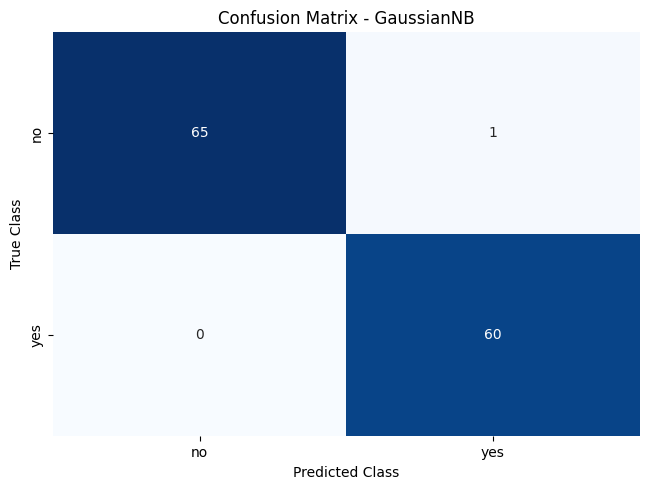

In [192]:
# Oversampling
classifer = GaussianNB().fit(X_train_dataOversampled, y_train_dataOversampled)
print(classifer.score(X_test_dataOversampled, y_test_dataOversampled))
pred = svc_model_dataOversampled.predict(X_test_dataOversampled)

dtree_model=make_pipeline(StandardScaler(),GaussianNB())
score=cross_val_score(dtree_model, X_test_dataOversampled, y_test_dataOversampled, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")
conf_mat(y_test_dataOversampled, pred,"GaussianNB")

# Hyperparameter tuning

Randomized Search nasumično bira određen broj kombinacija hiperparametara iz predefinisanog prostora vrednosti. Za svaku nasumično izabranu kombinaciju, model se trenira na trening podacima i evaluira na validacionom skupu koristeći odabrane metrike performansi. Nakon završetka pretrage, Randomized Search vraća najbolje pronađene vrednosti hiperparametara, omogućavajući efikasnu optimizaciju modela. 

Grid Search: Prostor parametara je definisan unapred, a Grid Search ispituje sve kombinacije parametara unutar tog prostora. Za svaku kombinaciju, model se trenira na trening podacima i evaluira na validacionom skupu koristeći odabrane metrike performansi. Nakon završetka pretrage, Grid Search vraća kombinaciju hiperparametara koja je dala najbolje rezultate prema zadatim metrikama. 

## Decision Tree

In [193]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

### RandomizedSearchCV

In [194]:
param_dist = {
   "max_depth": [3,5,7, None],
    "max_features": randint(1, 10),
    "min_samples_leaf": randint(1, 10),
    "criterion": ["gini", "entropy"]
}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, n_iter=20, cv=5, random_state=42)
tree_cv.fit(X_data, y_data)
 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

dtree_model=make_pipeline(StandardScaler(),RandomizedSearchCV(tree, param_dist, n_iter=20, cv=5, random_state=42))
cv=KFold(n_splits=5, shuffle=True, random_state=12)
score=cross_val_score(dtree_model, X_test_data, y_test_data, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1}
Best score is 0.9494764896249762
Average Cross Validation Accuracy:  86.43%


### GridSearchCV

In [195]:
param_grid = {
    "max_depth": [3, 5, 7, None],
    "max_features": [1, 2, 3, 4, 5, 6, 7, 8, 9],  # Prilagodite raspon prema potrebi
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9],  # Prilagodite raspon prema potrebi
    "criterion": ["gini", "entropy"]
}
tree = DecisionTreeClassifier()

# Inicijalizacija GridSearchCV
tree_cv = GridSearchCV(tree, param_grid, cv=5)
tree_cv.fit(X_data, y_data)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

dtree_model=make_pipeline(StandardScaler(),GridSearchCV(tree, param_grid, cv=5))
cv=KFold(n_splits=5, shuffle=True, random_state=12)
score=cross_val_score(dtree_model, X_test_data, y_test_data, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1}
Best score is 0.9728155339805825
Average Cross Validation Accuracy:  81.62%


## Random Forest

In [196]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report 

### GridSearchCV

In [234]:
# param_grid = {
#     "n_estimators": [25, 50, 100, 150, 200],
#     "max_features": ["sqrt", "log2", None],
#     "max_depth": [3, 6, 9, 12],
#     "max_leaf_nodes": [3, 6, 9, 12],
#     "min_samples_leaf": [1, 2, 4, 8],
#     "criterion": ["gini", "entropy"]
# }

# # Inicijalizacija modela
# rf = RandomForestClassifier()

# # Inicijalizacija GridSearchCV
# rf_grid = GridSearchCV(rf, param_grid=param_grid, cv=5)
# rf_grid.fit(X_data, y_data)

# # Ispis rezultata
# print("Tuned Random Forest Parameters: {}".format(rf_grid.best_params_))
# print("Best score is {}".format(rf_grid.best_score_))

### RandomizedSearchCV

In [198]:
param_dist = {
    "n_estimators": [25, 50, 100, 150, 200],
    "max_features": ["sqrt", "log2", None],
    "max_depth": [3, 6, 9, 12],
    "max_leaf_nodes": [3, 6, 9, 12],
    "min_samples_leaf": [1, 2, 4, 8],
    "criterion": ["gini", "entropy"]
}

# Inicijalizacija modela
rf = RandomForestClassifier()

# Inicijalizacija RandomizedSearchCV
rf_random = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)
rf_random.fit(X_data, y_data)

# Ispis rezultata
print("Tuned Random Forest Parameters: {}".format(rf_random.best_params_))
print("Best score is {}".format(rf_random.best_score_))

dtree_model=make_pipeline(StandardScaler(),RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, random_state=42))
cv=KFold(n_splits=5, shuffle=True, random_state=12)
score=cross_val_score(dtree_model, X_test_data, y_test_data, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

Tuned Random Forest Parameters: {'n_estimators': 150, 'min_samples_leaf': 4, 'max_leaf_nodes': 12, 'max_features': None, 'max_depth': 9, 'criterion': 'entropy'}
Best score is 0.9494384161431564
Average Cross Validation Accuracy:  90.33%


### SVC

### RandomizedSearchCV

In [230]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Definisanje parametara za pretragu
param_dist = {
    "C": [0.1, 1, 10, 100, 1000],
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "gamma": ["scale", "auto"] + list(np.logspace(-3, 3, 7))
}

# Inicijalizacija modela
rf = SVC(kernel="rbf", gamma=1, C=100, random_state=0)

# Inicijalizacija RandomizedSearchCV
rf_random = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)
rf_random.fit(X_data, y_data)

# Ispis rezultata
print("Tuned Random Forest Parameters: {}".format(rf_random.best_params_))
print("Best score is {}".format(rf_random.best_score_))

dtree_model=make_pipeline(StandardScaler(), RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=5, random_state=42))
cv=KFold(n_splits=5, shuffle=True, random_state=12)
score=cross_val_score(dtree_model, X_test_data, y_test_data, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

Tuned Random Forest Parameters: {'kernel': 'rbf', 'gamma': 1.0, 'C': 10}
Best score is 0.9708357129259471
Average Cross Validation Accuracy:  85.52%


### GridSearchCV

In [232]:
param_grid = {
    "C": [0.1, 1, 10, 100, 1000],
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "gamma": ["scale", "auto"] + list(np.logspace(-3, 3, 7))
}

# Inicijalizacija modela
rf = SVC(kernel="rbf", gamma=1, C=100, random_state=0)

# Inicijalizacija GridSearchCV
rf_grid = GridSearchCV(rf, param_grid=param_grid, cv=5)
rf_grid.fit(X_data, y_data)

# Ispis rezultata
print("Tuned Random Forest Parameters: {}".format(rf_grid.best_params_))
print("Best score is {}".format(rf_grid.best_score_))
dtree_model=make_pipeline(StandardScaler(), GridSearchCV(rf, param_grid=param_grid, cv=5))
cv=KFold(n_splits=5, shuffle=True, random_state=12)
score=cross_val_score(dtree_model, X_test_data, y_test_data, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")

Tuned Random Forest Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best score is 0.9747192080715781
Average Cross Validation Accuracy:  87.48%


# Dimensionality reduction - Dodatni algoritmi

## Recursive Feature Elimination - RFE

RFE počinje treniranjem modela na originalnom skupu podataka koji sadrži sve karakteristike. Zatim, karakteristike se ocenjuju prema njihovom doprinosu učenju modela, na primer, na osnovu njihovih koeficijenata. Najmanje značajne karakteristike se eliminiraju, a postupak se ponavlja iterativno. Model se ponovo trenira sa preostalim karakteristikama, ocenjuje se njihova značajnost, i ponovo se eliminisu najmanje značajne karakteristike. Ovaj proces se ponavlja sve dok se ne postigne željeni broj karakteristika ili dok se performanse modela više ne poboljšavaju.

In [201]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

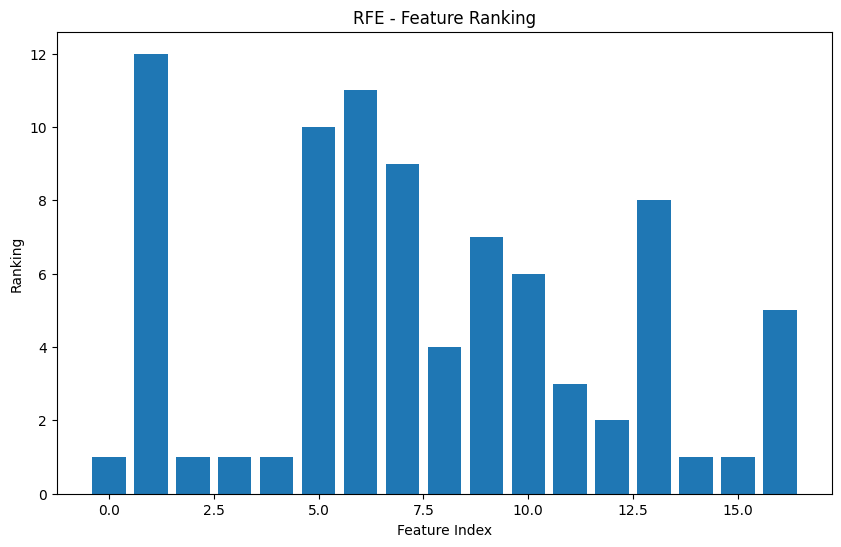

Selected Features: [ 0  2  3  4 14 15]
Accuracy on the Test Set: 0.970873786407767
Average Cross Validation Accuracy:  89.33%


In [218]:
model = DecisionTreeClassifier(random_state=42)
num_features_to_select = 6
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)
rfe.fit(X_data, y_data)
feature_ranking = rfe.ranking_
selected_features = np.where(feature_ranking == 1)[0]

plt.figure(figsize=(10, 6))
plt.title("RFE - Feature Ranking")
plt.xlabel("Feature Index")
plt.ylabel("Ranking")
plt.bar(range(len(feature_ranking)), feature_ranking)
plt.show()

print("Selected Features:", selected_features)
model.fit(X_data.iloc[:, selected_features], y_data)
accuracy = model.score(X_test_data.iloc[:, selected_features], y_test_data)
print("Accuracy on the Test Set:", accuracy)


dtree_model=make_pipeline(StandardScaler(), RFE(estimator=model, n_features_to_select=num_features_to_select))
cv=KFold(n_splits=5, shuffle=True, random_state=12)
score=cross_val_score(dtree_model, X_test_data, y_test_data, cv=cv, scoring="accuracy")
average=np.mean(score)
print(f"Average Cross Validation Accuracy:  {average*100:.2f}%")


## LASSO

Tokom treninga, LASSO favorizuje karakteristike koje su važne za model, a zanemaruje manje bitne. Ovo se postiže dodavanjem posebnog člana u proces treninga, a da pri tome ne zahteva dodatne podešavanje težina.

In [240]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

def train_with_lasso_regularization(modelName, classifier, alpha=1.0, **kwargs,):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_data)
    lasso_model = Lasso(alpha=alpha, **kwargs)
    feature_selector = SelectFromModel(lasso_model)
    model = make_pipeline(feature_selector, classifier)
    model.fit(X_train_scaled, y_data)
    X_test_scaled = scaler.transform(X_test_data)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_data, y_pred)

    print(f'Best {modelName} accuracy is  {accuracy}')

    cv_accuracy = cross_val_score(model, X_train_scaled, y_data, cv=5, scoring='accuracy').mean()
    print(f'Cross-validated accuracy: {cv_accuracy}')
    selected_features = feature_selector.get_support()
    num_features_selected = sum(selected_features)
    print(f'Number of features selected: {num_features_selected}')



lasso_logreg_model = train_with_lasso_regularization("Decision Tree", DecisionTreeClassifier(criterion= 'entropy', max_depth= None, max_features= 5, min_samples_leaf= 1), alpha=0.1)

lasso_logreg_model = train_with_lasso_regularization("Random Forest", RandomForestClassifier(n_estimators= 150, min_samples_leaf= 4, max_leaf_nodes=12, max_features= None, max_depth= 9, criterion= 'entropy') , alpha=0.1)

Best Decision Tree accuracy is  0.9223300970873787
Cross-validated accuracy: 0.893051589567866
Number of features selected: 3
Best Random Forest accuracy is  0.9223300970873787
Cross-validated accuracy: 0.893051589567866
Number of features selected: 3


## PCA

 Osnovna ideja je identifikacija novih, nezavisnih promenljivih (principalnih komponenata) koje zadržavaju ključne informacije iz originalnih podataka. Ove komponente se biraju tako da zadrže što veći deo varijacije u podacima. PCA radi tako što transformiše podatke tako da se većina informacija zadrži u prvih nekoliko komponenata, čime se postiže efikasnija reprezentacija podataka. 

In [204]:
from sklearn import decomposition
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [238]:
pca = decomposition.PCA()
def pca_f(model, modelName, test=False):
    pipe=Pipeline(steps=[('pca',pca),('model',model)])
    model=pipe.fit(X_data, y_data)
    prediction=model.predict(X_test_data)
    print(f"Best {modelName} accuracy:", accuracy_score(y_test_data, prediction, normalize=True))   
    dtree_model=make_pipeline(StandardScaler(), model)
    cv=KFold(n_splits=5, shuffle=True, random_state=12)
    score=cross_val_score(dtree_model, X_test_data, y_test_data, cv=cv, scoring="accuracy")
    average=np.mean(score)
    print(f"Average {modelName} Cross Validation Accuracy:  {average*100:.2f}%")


dtc = DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, max_features= 5, min_samples_leaf= 1)
pca_f(dtc,"Decision Tree")

rfc = RandomForestClassifier(n_estimators= 150, min_samples_leaf= 4, max_leaf_nodes=12, max_features= None, max_depth= 9, criterion= 'entropy') 
pca_f(rfc,"Random Forest")


Best Decision Tree accuracy: 0.970873786407767
Average Decision Tree Cross Validation Accuracy:  82.57%
Best Random Forest accuracy: 0.9902912621359223
Average Random Forest Cross Validation Accuracy:  86.43%
